# Analisis e insights

## Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%config IPCompleter.greedy=True
pd.options.display.float_format = "{:15.2f}".format

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_pickle("../Datos/tablon_analitico.pickle")
df

usuario                                sesion  \
fecha                                                                  
2019-10-01 00:01:46  462033176  a18e0999-61a1-4218-8f8f-61ec1d375361   
2019-10-01 00:01:55  514753614  e2fecb2d-22d0-df2c-c661-15da44b3ccf1   
2019-10-01 00:02:50  527418424  86e77869-afbc-4dff-9aa2-6b7dd8c90770   
2019-10-01 00:03:41  555448072  b5f72ceb-0730-44de-a932-d16db62390df   
2019-10-01 00:03:44  552006247  2d8f304b-de45-4e59-8f40-50c603843fe5   
...                        ...                                   ...   
2020-02-29 23:58:49  147995998  5ff96629-3627-493e-a25b-5a871ec78c90   
2020-02-29 23:58:57  147995998  5ff96629-3627-493e-a25b-5a871ec78c90   
2020-02-29 23:59:05  147995998  5ff96629-3627-493e-a25b-5a871ec78c90   
2020-02-29 23:59:28  619841242  18af673b-7fb9-4202-a66d-5c855bc0fd2d   
2020-02-29 23:59:54  619841242  18af673b-7fb9-4202-a66d-5c855bc0fd2d   

                               categoria evento  producto          precio  \
fecha                                                                       
2019-10-01 00:01:46  1487580005092295511   view   5843665            9.44   
2019-10-01 00:01:55  1487580013069861041   cart   5868461            3.57   
2019-10-01 00:02:50  1487580006300255120   view   5877456          122.22   
2019-10-01 00:03:41  1487580013749338323   view   5649270            6.19   
2019-10-01 00:03:44  1487580005411062629   view     18082           16.03   
...                                  ...    ...       ...             ...   
2020-02-29 23:58:49  1487580006317032337   cart   5815662            0.92   
2020-02-29 23:58:57  1487580006317032337   view   5815665            0.59   
2020-02-29 23:59:05  1487580006317032337   cart   5815665            0.59   
2020-02-29 23:59:28  1487580010872045658   view   5817692            0.79   
2020-02-29 23:59:54  1487580010872045658   view   5716351            0.79   

                           date   año  mes  dia  hora  minuto  segundo  \
fecha                                                                    
2019-10-01 00:01:46  2019-10-01  2019   10    1     0       1       46   
2019-10-01 00:01:55  2019-10-01  2019   10    1     0       1       55   
2019-10-01 00:02:50  2019-10-01  2019   10    1     0       2       50   
2019-10-01 00:03:41  2019-10-01  2019   10    1     0       3       41   
2019-10-01 00:03:44  2019-10-01  2019   10    1     0       3       44   
...                         ...   ...  ...  ...   ...     ...      ...   
2020-02-29 23:58:49  2020-02-29  2020    2   29    23      58       49   
2020-02-29 23:58:57  2020-02-29  2020    2   29    23      58       57   
2020-02-29 23:59:05  2020-02-29  2020    2   29    23      59        5   
2020-02-29 23:59:28  2020-02-29  2020    2   29    23      59       28   
2020-02-29 23:59:54  2020-02-29  2020    2   29    23      59       54   

                     festivo  black_friday  san_valentin  
fecha                                                     
2019-10-01 00:01:46        0             0             0  
2019-10-01 00:01:55        0             0             0  
2019-10-01 00:02:50        0             0             0  
2019-10-01 00:03:41        0             0             0  
2019-10-01 00:03:44        0             0             0  
...                      ...           ...           ...  
2020-02-29 23:58:49        0             0             0  
2020-02-29 23:58:57        0             0             0  
2020-02-29 23:59:05        0             0             0  
2020-02-29 23:59:28        0             0             0  
2020-02-29 23:59:54        0             0             0  

[2074026 rows x 16 columns]

In [3]:
df.shape

(2074026, 16)

In [4]:
df.producto.nunique()

45327

### Media Facturacion Mensual 

In [5]:
df.loc[df.evento=="purchase"].groupby("mes").precio.sum().mean()

124309.92

### Analisis Customer Journey

In [6]:
eventos = df.evento.value_counts()
eventos

evento
view                961558
cart                574547
remove_from_cart    410357
purchase            127564
Name: count, dtype: int64

In [7]:
kpi_visualizaciones_p = 100
kpi_carrito_p = eventos.loc["cart"] / eventos.loc["view"] * 100
kpi_abandono_p= eventos.loc["remove_from_cart"] / eventos.loc["cart"] * 100
kpi_compra_p = eventos.loc["purchase"] / eventos.loc["cart"] * 100

In [8]:
kpis = pd.DataFrame({"kpi":["visualizaciones", "carrito", "compra"], 
             "pct":[kpi_visualizaciones_p, kpi_carrito_p, kpi_compra_p]})
kpis

kpi             pct
0  visualizaciones          100.00
1          carrito           59.75
2           compra           22.20

### Gráfico de Funnel

In [9]:
from plotly import graph_objects as go

In [10]:
def funnel_analytics(eventos): 
    eventos= df.evento.value_counts()
    kpi_visualizaciones_p = 100
    kpi_carrito_p = eventos.loc["cart"] / eventos.loc["view"] * 100
    kpi_abandono_p= eventos.loc["remove_from_cart"] / eventos.loc["cart"] * 100
    kpi_compra_p = eventos.loc["purchase"] / eventos.loc["cart"] * 100

    kpis = pd.DataFrame({"kpi":["visualizaciones", "carrito", "compra"], 
             "pct":[kpi_visualizaciones_p, kpi_carrito_p, kpi_compra_p]})
    
    fig = go.Figure(go.Funnel(
    y= kpis.kpi,
    x= kpis.pct.round(2),
    marker = {"color": ["red", "blue", "green"]},
    opacity = 0.3
                    ))
    fig.update_layout(title = "Funnel Conversión Inicial (%)")
    fig.update_layout(
    autosize=False,
    width=1000,
    height=500,)
    fig.show()
    print(f'Las tasas de partida son: un {kpi_carrito_p.round(2)}% de las visualizaciones se añade al carrito y un {kpi_compra_p.round(2)}% de lo añadido al carrito se termina comprando. \n')
    print(f'Por tanto existe un {100 - kpi_carrito_p.round(2)}% de visualizaciones sobre las que hay que trabajar para conseguir más carritos.\n')

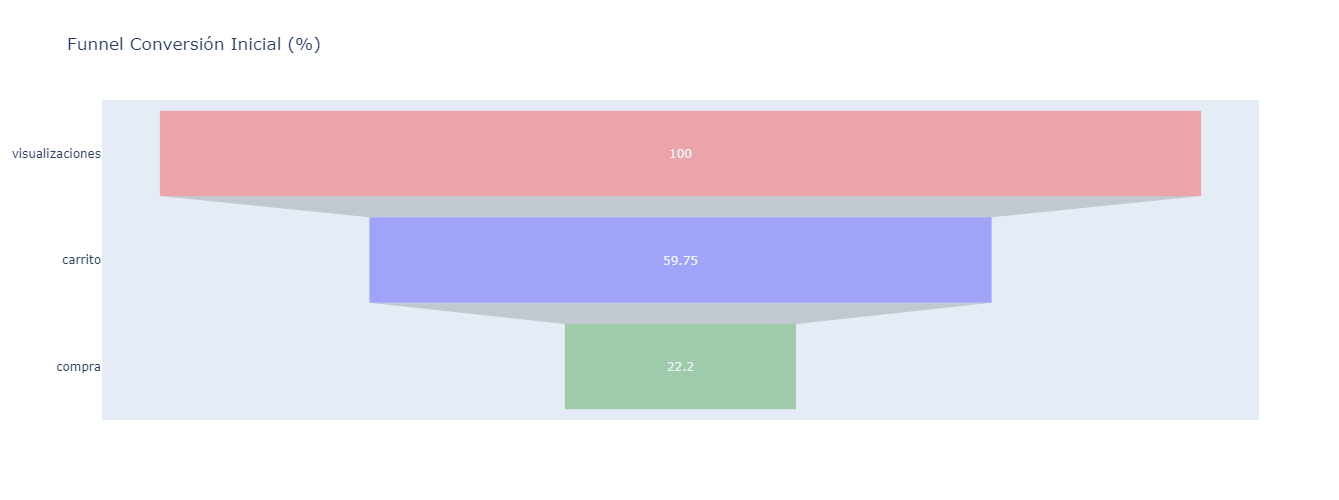

Las tasas de partida son: un 59.75% de las visualizaciones se añade al carrito y un 22.2% de lo añadido al carrito se termina comprando. 

Por tanto existe un 40.25% de visualizaciones sobre las que hay que trabajar para conseguir más carritos.



<Figure size 640x480 with 0 Axes>

In [11]:
funnel_analytics(df.evento)
plt.savefig("GraficodeFunnel");

### Analisis del customer Journey por sesión

In [12]:
df.head(3)

usuario                                sesion  \
fecha                                                                  
2019-10-01 00:01:46  462033176  a18e0999-61a1-4218-8f8f-61ec1d375361   
2019-10-01 00:01:55  514753614  e2fecb2d-22d0-df2c-c661-15da44b3ccf1   
2019-10-01 00:02:50  527418424  86e77869-afbc-4dff-9aa2-6b7dd8c90770   

                               categoria evento  producto          precio  \
fecha                                                                       
2019-10-01 00:01:46  1487580005092295511   view   5843665            9.44   
2019-10-01 00:01:55  1487580013069861041   cart   5868461            3.57   
2019-10-01 00:02:50  1487580006300255120   view   5877456          122.22   

                           date   año  mes  dia  hora  minuto  segundo  \
fecha                                                                    
2019-10-01 00:01:46  2019-10-01  2019   10    1     0       1       46   
2019-10-01 00:01:55  2019-10-01  2019   10    1     0       1       55   
2019-10-01 00:02:50  2019-10-01  2019   10    1     0       2       50   

                     festivo  black_friday  san_valentin  
fecha                                                     
2019-10-01 00:01:46        0             0             0  
2019-10-01 00:01:55        0             0             0  
2019-10-01 00:02:50        0             0             0

In [13]:
sesion_prod = df.groupby(["sesion", "evento"]).producto.count()
sesion_prod

sesion                                evento
0000597b-de39-4a77-9fe5-02c8792ca14e  view      3
0000645a-8160-4a3d-91bf-154bff0a22e3  view      2
000090e1-da13-42b1-a31b-91a9ee5e6a88  view      1
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b  view      1
0000de26-bd58-42c9-9173-4763c76b398e  view      1
                                               ..
ffff6695-b64d-4a67-aa14-34b3b7f63c3f  view      2
ffff7d69-b706-4c64-9d6d-da57a04bc32b  view      1
ffff8044-2a22-4846-8a72-999e870abbe9  view      1
ffff91d4-7879-4a4b-8b26-c67915a27dc8  view      1
ffffbe0a-d2c2-47c7-afab-680bfdfda50d  view      1
Name: producto, Length: 581763, dtype: int64

In [14]:
sesion_prod = sesion_prod.unstack().fillna(0)
sesion_prod

evento                                          cart        purchase  \
sesion                                                                 
0000597b-de39-4a77-9fe5-02c8792ca14e            0.00            0.00   
0000645a-8160-4a3d-91bf-154bff0a22e3            0.00            0.00   
000090e1-da13-42b1-a31b-91a9ee5e6a88            0.00            0.00   
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b            0.00            0.00   
0000de26-bd58-42c9-9173-4763c76b398e            0.00            0.00   
...                                              ...             ...   
ffff6695-b64d-4a67-aa14-34b3b7f63c3f            0.00            0.00   
ffff7d69-b706-4c64-9d6d-da57a04bc32b            0.00            0.00   
ffff8044-2a22-4846-8a72-999e870abbe9            0.00            0.00   
ffff91d4-7879-4a4b-8b26-c67915a27dc8            0.00            0.00   
ffffbe0a-d2c2-47c7-afab-680bfdfda50d            0.00            0.00   

evento                                remove_from_cart            view  
sesion                                                                  
0000597b-de39-4a77-9fe5-02c8792ca14e              0.00            3.00  
0000645a-8160-4a3d-91bf-154bff0a22e3              0.00            2.00  
000090e1-da13-42b1-a31b-91a9ee5e6a88              0.00            1.00  
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b              0.00            1.00  
0000de26-bd58-42c9-9173-4763c76b398e              0.00            1.00  
...                                                ...             ...  
ffff6695-b64d-4a67-aa14-34b3b7f63c3f              0.00            2.00  
ffff7d69-b706-4c64-9d6d-da57a04bc32b              0.00            1.00  
ffff8044-2a22-4846-8a72-999e870abbe9              0.00            1.00  
ffff91d4-7879-4a4b-8b26-c67915a27dc8              0.00            1.00  
ffffbe0a-d2c2-47c7-afab-680bfdfda50d              0.00            1.00  

[446054 rows x 4 columns]

In [15]:
sesion_prod.sum()

evento
cart                     574547.00
purchase                 127564.00
remove_from_cart         410357.00
view                     961558.00
dtype: float64

In [16]:
sesion_prod = sesion_prod[["view", "cart", "remove_from_cart", "purchase"]]
sesion_prod

evento                                          view            cart  \
sesion                                                                 
0000597b-de39-4a77-9fe5-02c8792ca14e            3.00            0.00   
0000645a-8160-4a3d-91bf-154bff0a22e3            2.00            0.00   
000090e1-da13-42b1-a31b-91a9ee5e6a88            1.00            0.00   
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b            1.00            0.00   
0000de26-bd58-42c9-9173-4763c76b398e            1.00            0.00   
...                                              ...             ...   
ffff6695-b64d-4a67-aa14-34b3b7f63c3f            2.00            0.00   
ffff7d69-b706-4c64-9d6d-da57a04bc32b            1.00            0.00   
ffff8044-2a22-4846-8a72-999e870abbe9            1.00            0.00   
ffff91d4-7879-4a4b-8b26-c67915a27dc8            1.00            0.00   
ffffbe0a-d2c2-47c7-afab-680bfdfda50d            1.00            0.00   

evento                                remove_from_cart        purchase  
sesion                                                                  
0000597b-de39-4a77-9fe5-02c8792ca14e              0.00            0.00  
0000645a-8160-4a3d-91bf-154bff0a22e3              0.00            0.00  
000090e1-da13-42b1-a31b-91a9ee5e6a88              0.00            0.00  
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b              0.00            0.00  
0000de26-bd58-42c9-9173-4763c76b398e              0.00            0.00  
...                                                ...             ...  
ffff6695-b64d-4a67-aa14-34b3b7f63c3f              0.00            0.00  
ffff7d69-b706-4c64-9d6d-da57a04bc32b              0.00            0.00  
ffff8044-2a22-4846-8a72-999e870abbe9              0.00            0.00  
ffff91d4-7879-4a4b-8b26-c67915a27dc8              0.00            0.00  
ffffbe0a-d2c2-47c7-afab-680bfdfda50d              0.00            0.00  

[446054 rows x 4 columns]

In [17]:
sesion_prod.mean()

evento
view                          2.16
cart                          1.29
remove_from_cart              0.92
purchase                      0.29
dtype: float64

### Analisis de los eventos por horas

In [18]:
eventos_hora = df.groupby(["evento", "hora"]).producto.count()
eventos_hora

evento  hora
cart    0        6475
        1        5555
        2        6433
        3        8544
        4       11242
                ...  
view    19      63730
        20      57311
        21      38905
        22      23043
        23      13307
Name: producto, Length: 96, dtype: int64

In [19]:
eventos_hora = eventos_hora.unstack(level=0)
eventos_hora

evento   cart  purchase  remove_from_cart   view
hora                                            
0        6475       962              3238   8731
1        5555      1128              3930   7280
2        6433      1220              3509   8378
3        8544      1535              5331  11807
4       11242      2389              8095  18365
5       16890      3491             11913  27438
6       21993      5125             16223  38055
7       27069      5951             17883  46072
8       29526      7158             21156  49587
9       32095      7593             21680  54185
10      32901      7816             23982  56458
11      33284      8495             25496  57594
12      34258      8250             23714  57530
13      31996      8133             22852  55534
14      30451      7122             21835  52184
15      28789      6485             20162  49809
16      28775      6531             19791  51055
17      32525      6242             24330  55667
18      36435      8211             30551  59533
19      39609      7435             27666  63730
20      34828      7256             24985  57311
21      23228      4606             17396  38905
22      13589      2883              8680  23043
23       8057      1547              5959  13307

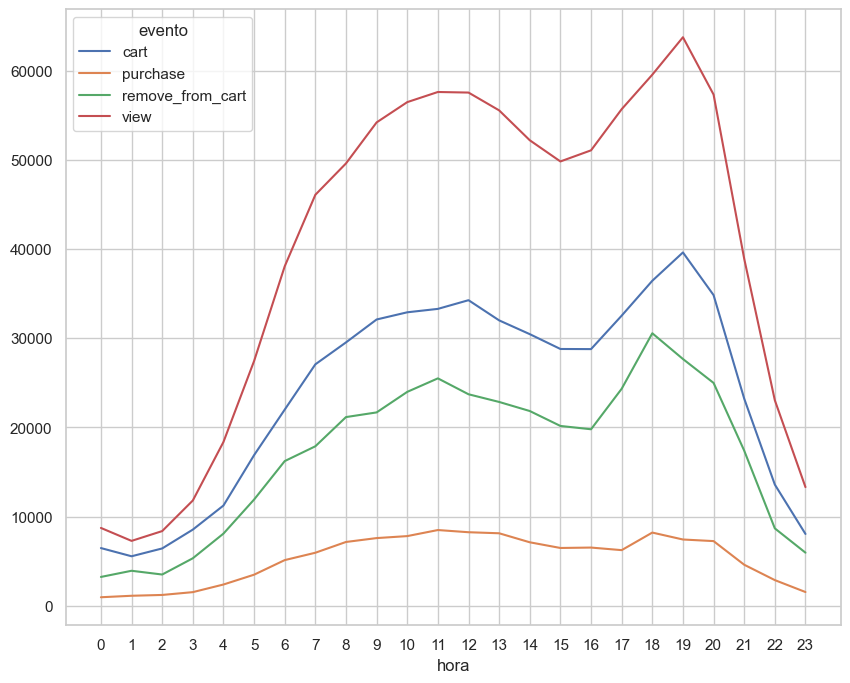

In [20]:
eventos_hora.plot(figsize=(10,8))
plt.xticks(ticks=eventos_hora.index);

In [21]:
eventos_hora["compras_por_visita_%"] = (eventos_hora.purchase / eventos_hora.view)*100
eventos_hora

evento   cart  purchase  remove_from_cart   view  compras_por_visita_%
hora                                                                  
0        6475       962              3238   8731                 11.02
1        5555      1128              3930   7280                 15.49
2        6433      1220              3509   8378                 14.56
3        8544      1535              5331  11807                 13.00
4       11242      2389              8095  18365                 13.01
5       16890      3491             11913  27438                 12.72
6       21993      5125             16223  38055                 13.47
7       27069      5951             17883  46072                 12.92
8       29526      7158             21156  49587                 14.44
9       32095      7593             21680  54185                 14.01
10      32901      7816             23982  56458                 13.84
11      33284      8495             25496  57594                 14.75
12      34258      8250             23714  57530                 14.34
13      31996      8133             22852  55534                 14.65
14      30451      7122             21835  52184                 13.65
15      28789      6485             20162  49809                 13.02
16      28775      6531             19791  51055                 12.79
17      32525      6242             24330  55667                 11.21
18      36435      8211             30551  59533                 13.79
19      39609      7435             27666  63730                 11.67
20      34828      7256             24985  57311                 12.66
21      23228      4606             17396  38905                 11.84
22      13589      2883              8680  23043                 12.51
23       8057      1547              5959  13307                 11.63

In [22]:
eventos_hora = eventos_hora[["view", "cart", "remove_from_cart", "purchase", "compras_por_visita_%"]]
eventos_hora

evento   view   cart  remove_from_cart  purchase  compras_por_visita_%
hora                                                                  
0        8731   6475              3238       962                 11.02
1        7280   5555              3930      1128                 15.49
2        8378   6433              3509      1220                 14.56
3       11807   8544              5331      1535                 13.00
4       18365  11242              8095      2389                 13.01
5       27438  16890             11913      3491                 12.72
6       38055  21993             16223      5125                 13.47
7       46072  27069             17883      5951                 12.92
8       49587  29526             21156      7158                 14.44
9       54185  32095             21680      7593                 14.01
10      56458  32901             23982      7816                 13.84
11      57594  33284             25496      8495                 14.75
12      57530  34258             23714      8250                 14.34
13      55534  31996             22852      8133                 14.65
14      52184  30451             21835      7122                 13.65
15      49809  28789             20162      6485                 13.02
16      51055  28775             19791      6531                 12.79
17      55667  32525             24330      6242                 11.21
18      59533  36435             30551      8211                 13.79
19      63730  39609             27666      7435                 11.67
20      57311  34828             24985      7256                 12.66
21      38905  23228             17396      4606                 11.84
22      23043  13589              8680      2883                 12.51
23      13307   8057              5959      1547                 11.63

''

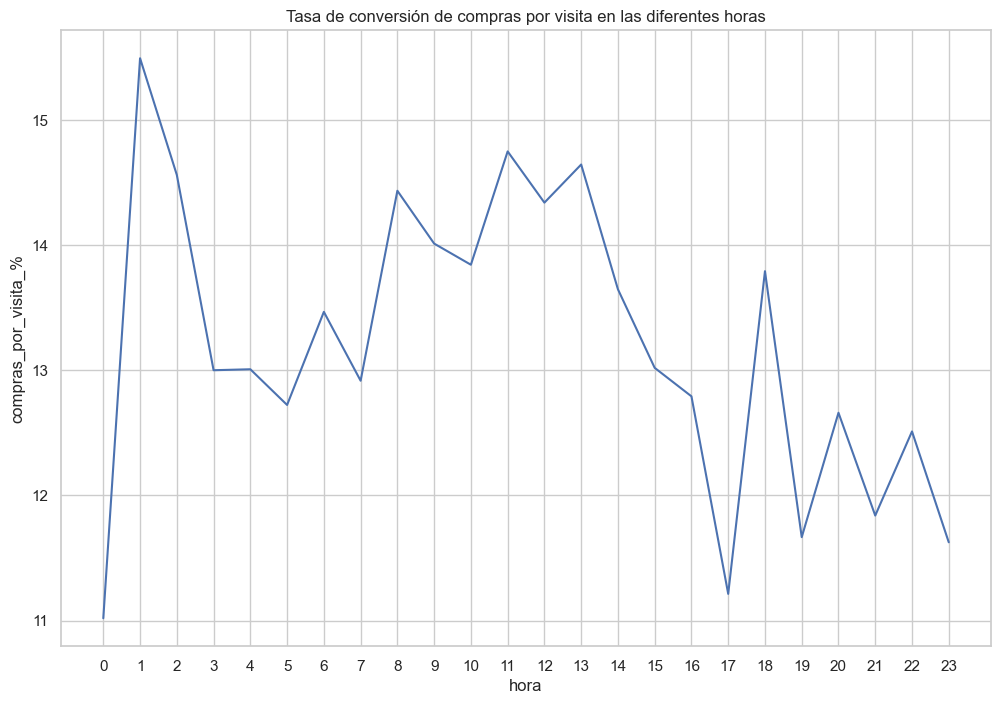

In [23]:
plt.figure(figsize= (12,8))
sns.lineplot(x= eventos_hora.index, y=eventos_hora["compras_por_visita_%"])
plt.xticks(eventos_hora.index)
plt.title("Tasa de conversión de compras por visita en las diferentes horas")
plt.savefig("Tase de conversion de compras por visita por horas")
;

Conclusiones:
    
* Las horas en las que la gente compra más son la 1, las 8, de 11 a 13 y las 18
* Las horas en las que la gente no compra son las 24, de 3 a 7, de 14 a 17 y de 19 a 23

Vamos a analizar ahora no de forma proporcional, si no en absoluto si existen o no horas más frecuentes para cada tipo de evento.

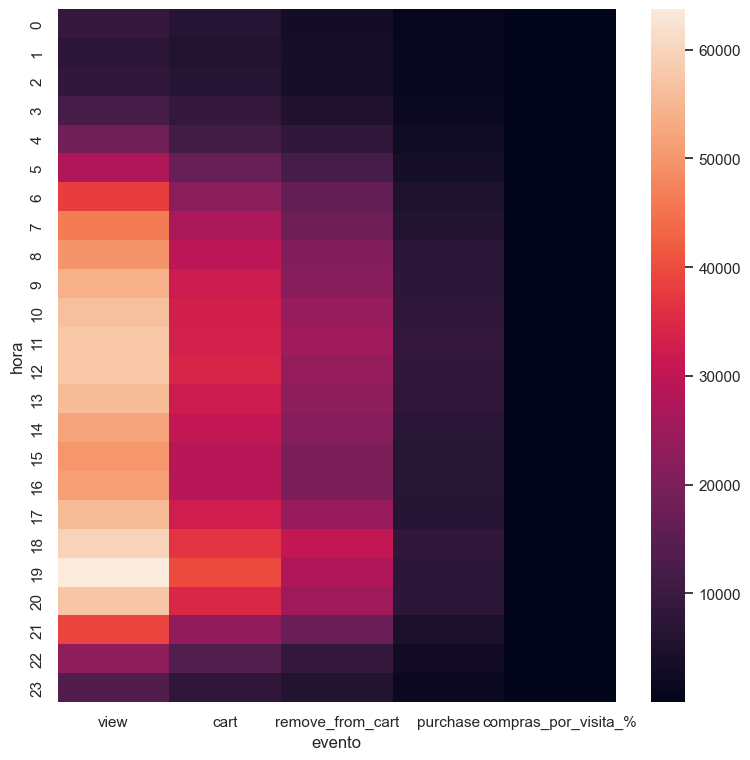

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(data=eventos_hora);

- Es necesario poner todas las variables en la misma escala para poder interpretar el gráfico

In [25]:
def tipificar(variable): 
    media = variable.mean()
    dt = variable.std()
    resultado = (variable.apply(lambda x: (x-media)/dt))
    return resultado

In [26]:
eventos_hora_tipificado = eventos_hora.apply(tipificar)
eventos_hora_tipificado

evento            view            cart  remove_from_cart        purchase  \
hora                                                                       
0                -1.60           -1.56             -1.63           -1.62   
1                -1.68           -1.64             -1.54           -1.56   
2                -1.62           -1.56             -1.59           -1.53   
3                -1.45           -1.37             -1.38           -1.41   
4                -1.11           -1.13             -1.06           -1.09   
5                -0.65           -0.63             -0.61           -0.68   
6                -0.10           -0.17             -0.10           -0.07   
7                 0.31            0.28              0.09            0.24   
8                 0.49            0.50              0.48            0.69   
9                 0.72            0.73              0.54            0.85   
10                0.84            0.80              0.81            0.93   
11                0.90            0.83              0.99            1.19   
12                0.89            0.92              0.78            1.09   
13                0.79            0.72              0.67            1.05   
14                0.62            0.58              0.56            0.67   
15                0.50            0.43              0.36            0.44   
16                0.56            0.43              0.32            0.45   
17                0.80            0.77              0.85            0.35   
18                1.00            1.11              1.58            1.08   
19                1.21            1.40              1.24            0.79   
20                0.88            0.97              0.93            0.72   
21               -0.06           -0.06              0.03           -0.26   
22               -0.87           -0.92             -0.99           -0.91   
23               -1.37           -1.42             -1.31           -1.40   

evento  compras_por_visita_%  
hora                          
0                      -1.83  
1                       1.91  
2                       1.13  
3                      -0.17  
4                      -0.17  
5                      -0.41  
6                       0.22  
7                      -0.24  
8                       1.03  
9                       0.67  
10                      0.53  
11                      1.29  
12                      0.95  
13                      1.20  
14                      0.37  
15                     -0.16  
16                     -0.35  
17                     -1.67  
18                      0.49  
19                     -1.29  
20                     -0.46  
21                     -1.14  
22                     -0.58  
23                     -1.32

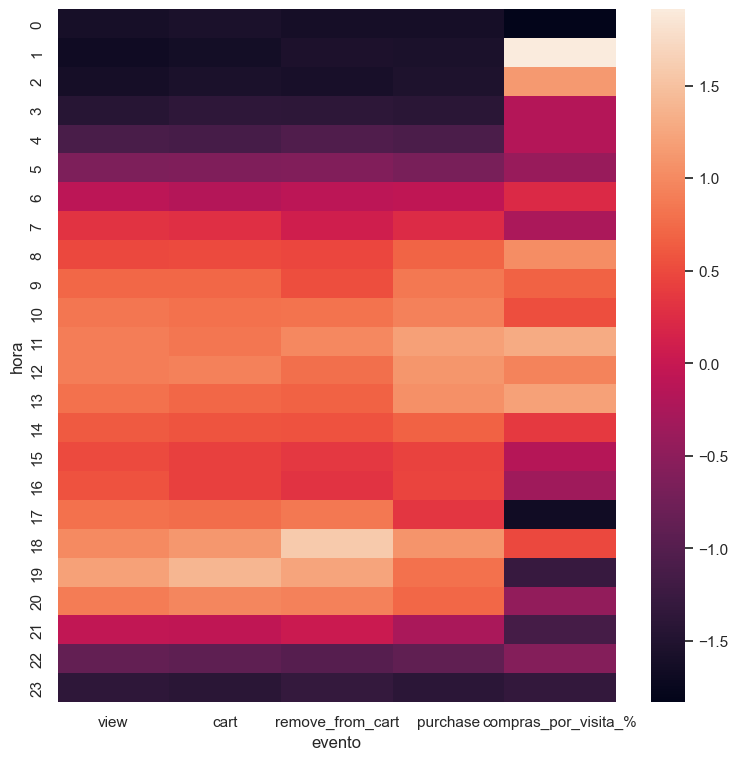

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(data=eventos_hora_tipificado);

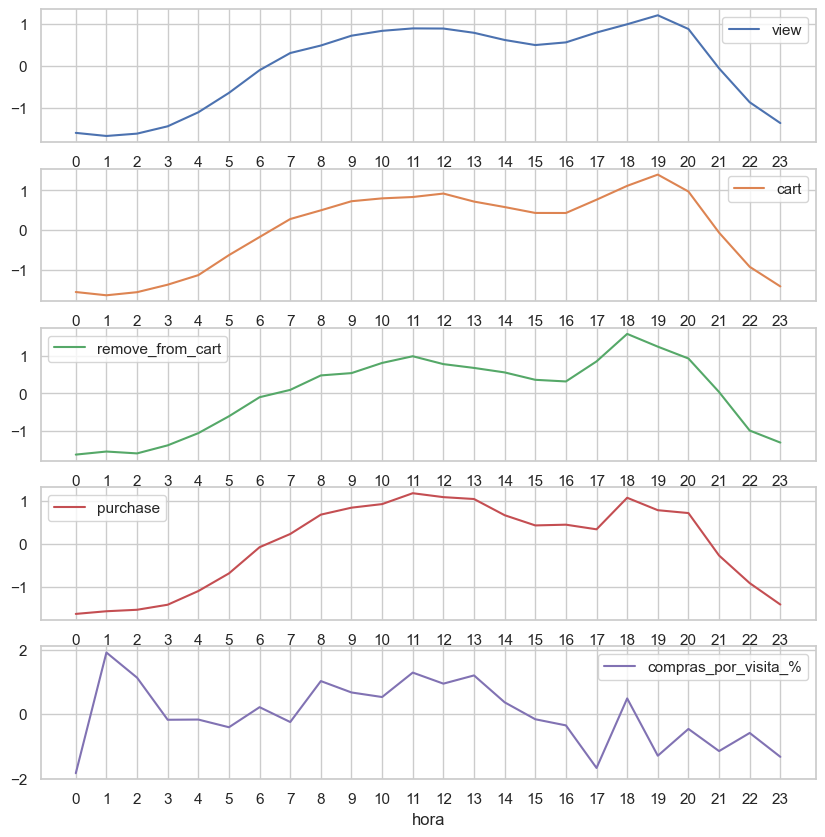

In [28]:
eventos_hora_tipificado.plot(subplots=True, sharex=False, figsize = (10,10), xticks = eventos_hora_tipificado.index)
plt.savefig("Eventos_hora_tipificado");

Conclusiones:

**INSIGHT #1**: Todas las métricas se maximzan en las franjas entre las 9 y las 13 y entre las 18 y las 20

Esta información es muy relevante por ejemplo de cara a paid ads, tanto de generación de tráfico como de retargeting

Además, parece haber algún subtipo de usuario que compra a la 1 de la mañana, que aunque no sea muy frecuente sí compra mucho

### Tendencias de los eventos

In [29]:
tendencia = df.groupby("evento").resample("W", kind="period").evento.count().unstack(level=0)
tendencia

evento                  cart  purchase  remove_from_cart   view
fecha                                                          
2019-09-30/2019-10-06  31483      4440             14647  36353
2019-10-07/2019-10-13  28151      5422             17989  44410
2019-10-14/2019-10-20  23920      5033             15303  39486
2019-10-21/2019-10-27  25651      5665             18411  40383
2019-10-28/2019-11-03  24087      5746             16491  39365
2019-11-04/2019-11-10  29142      6663             24008  46177
2019-11-11/2019-11-17  25335      5141             17215  41170
2019-11-18/2019-11-24  38069      9754             27973  56477
2019-11-25/2019-12-01  31994      7493             23106  48883
2019-12-02/2019-12-08  23265      5105             19443  42055
2019-12-09/2019-12-15  24636      5953             18246  45874
2019-12-16/2019-12-22  19927      4701             15452  39237
2019-12-23/2019-12-29  17051      3705             11102  32803
2019-12-30/2020-01-05  16735      3294             13464  31909
2020-01-06/2020-01-12  26264      5589             17956  46873
2020-01-13/2020-01-19  28402      6913             22945  50210
2020-01-20/2020-01-26  26353      6359             18544  48478
2020-01-27/2020-02-02  29193      7120             21102  52432
2020-02-03/2020-02-09  28796      5853             20050  48422
2020-02-10/2020-02-16  27836      6332             22601  47213
2020-02-17/2020-02-23  25619      6000             18146  43627
2020-02-24/2020-03-01  22638      5283             16163  39721

In [30]:
tendencia = tendencia[["view", "cart", "remove_from_cart", "purchase"]]
tendencia

evento                  view   cart  remove_from_cart  purchase
fecha                                                          
2019-09-30/2019-10-06  36353  31483             14647      4440
2019-10-07/2019-10-13  44410  28151             17989      5422
2019-10-14/2019-10-20  39486  23920             15303      5033
2019-10-21/2019-10-27  40383  25651             18411      5665
2019-10-28/2019-11-03  39365  24087             16491      5746
2019-11-04/2019-11-10  46177  29142             24008      6663
2019-11-11/2019-11-17  41170  25335             17215      5141
2019-11-18/2019-11-24  56477  38069             27973      9754
2019-11-25/2019-12-01  48883  31994             23106      7493
2019-12-02/2019-12-08  42055  23265             19443      5105
2019-12-09/2019-12-15  45874  24636             18246      5953
2019-12-16/2019-12-22  39237  19927             15452      4701
2019-12-23/2019-12-29  32803  17051             11102      3705
2019-12-30/2020-01-05  31909  16735             13464      3294
2020-01-06/2020-01-12  46873  26264             17956      5589
2020-01-13/2020-01-19  50210  28402             22945      6913
2020-01-20/2020-01-26  48478  26353             18544      6359
2020-01-27/2020-02-02  52432  29193             21102      7120
2020-02-03/2020-02-09  48422  28796             20050      5853
2020-02-10/2020-02-16  47213  27836             22601      6332
2020-02-17/2020-02-23  43627  25619             18146      6000
2020-02-24/2020-03-01  39721  22638             16163      5283

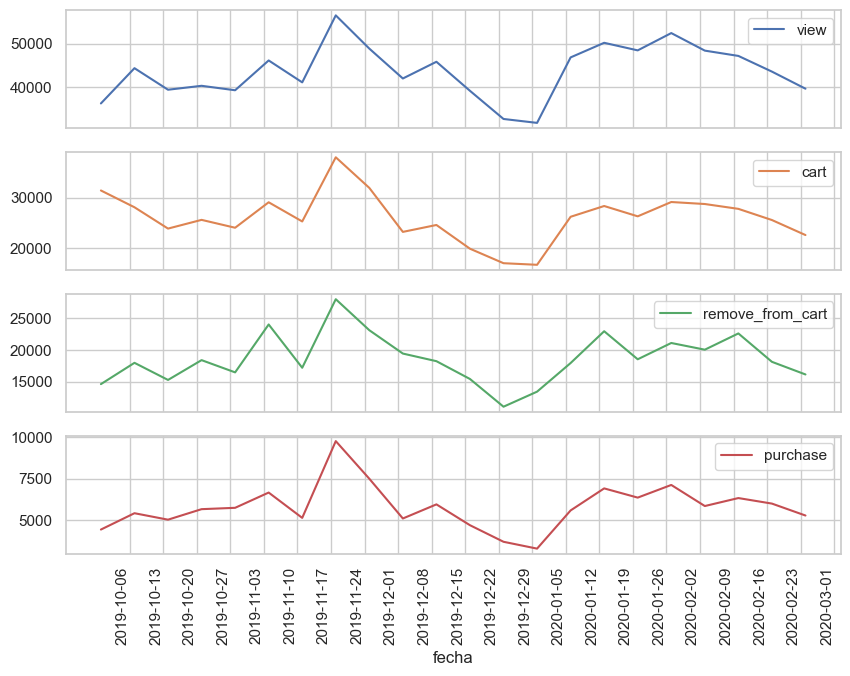

In [31]:
tendencia.plot(subplots = True, figsize = (10,8), xticks = tendencia.index,x_compat=True, rot = 90);

La tendencia es plana en todas las métricas, lo que confirma la necesidad de las acciones de CRO.

Existe un pico significativo en la semana del 24, obviamente por black friday, vamos a hacer el mismo análisis pero diario y solo para noviembre y diciembre para ver el efecto.

In [32]:
tendencia_diaria = df.loc["2019-11": "2019-12"].groupby("evento").resample("D").evento.count().unstack(level=0)
tendencia_diaria = tendencia_diaria[["view", "cart", "remove_from_cart", "purchase"]]
tendencia_diaria

evento      view  cart  remove_from_cart  purchase
fecha                                             
2019-11-01  5352  3565              2810       709
2019-11-02  4857  3015              2124       912
2019-11-03  5583  3540              2622       755
2019-11-04  6248  4652              4854       676
2019-11-05  7213  4118              2711       753
...          ...   ...               ...       ...
2019-12-27  4058  2023              1335       507
2019-12-28  3704  1744              1193       329
2019-12-29  3939  2134              1149       263
2019-12-30  3434  1364               823       258
2019-12-31  1724   563               447       114

[61 rows x 4 columns]

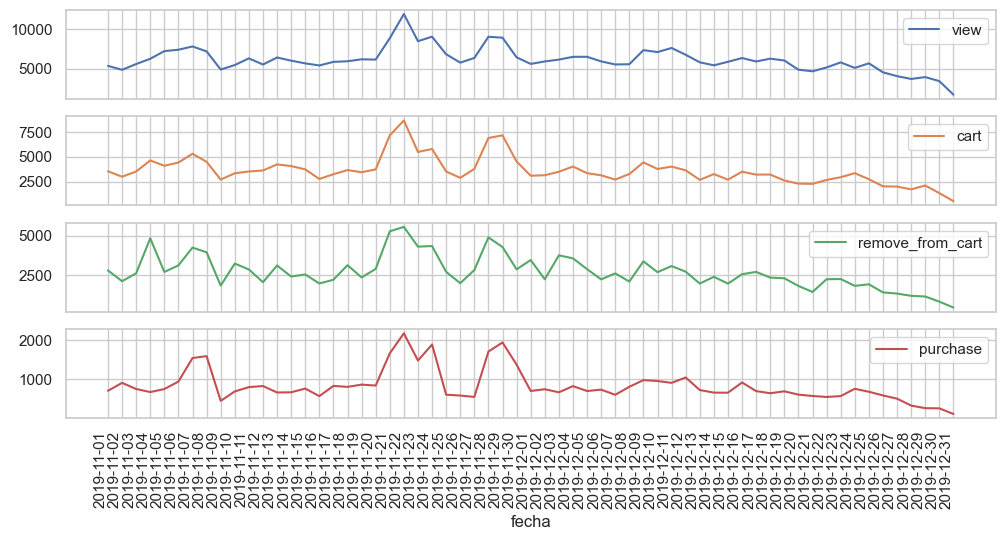

In [33]:
tendencia_diaria.plot(subplots = True, figsize = (12,6), xticks = tendencia_diaria.index, x_compat=True, rot=90)
plt.savefig("tendencia_diaria_eventos_nov_dic");

Conclusiones:

- Efectivamente el pico coincide con el black friday (día 29)
- Pero aún hay un pico mayor unos días antes, el día 22, posiblemente por el inicio de la semana black friday
- Sorprendemente los propios días de Navidad tienen una tendencia decreciente, lo que significa que los consumidores claramente han adelantado sus compras

Vamos a hacer el mismo análisis para Enero y Febrero.

In [34]:
tendencia_diaria = df.loc["2020-01": "2020-02"].groupby("evento").resample("D").evento.count().unstack(level=0)
tendencia_diaria = tendencia_diaria[["view", "cart", "remove_from_cart", "purchase"]]
tendencia_diaria

evento      view  cart  remove_from_cart  purchase
fecha                                             
2020-01-01  3671  2016              1671       286
2020-01-02  5451  2834              1969       522
2020-01-03  5352  2725              1989       551
2020-01-04  6048  3434              2931       671
2020-01-05  6229  3799              3634       892
2020-01-06  5205  2922              1855       639
2020-01-07  6261  3386              2559       716
2020-01-08  6846  3685              2606       867
2020-01-09  7669  4779              3015      1076
2020-01-10  6803  4051              2281       816
2020-01-11  6780  3324              2580       655
2020-01-12  7309  4117              3060       820
2020-01-13  7680  4934              3569      1068
2020-01-14  8034  4289              4615      1078
2020-01-15  7467  4547              3351      1053
2020-01-16  7304  4262              2748      1330
2020-01-17  7079  3540              2598       849
2020-01-18  5918  2944              1980       759
2020-01-19  6728  3886              4084       776
2020-01-20  7811  3762              2819       936
2020-01-21  7327  4120              2313       989
2020-01-22  6828  3647              2585      1077
2020-01-23  7261  3908              2665       811
2020-01-24  7103  4070              2718       897
2020-01-25  5545  3302              2266       770
2020-01-26  6603  3544              3178       879
2020-01-27  9158  6396              4920      2105
2020-01-28  8708  4844              3212      1738
2020-01-29  7177  3903              2431       714
2020-01-30  6736  3723              2086       616
2020-01-31  6299  3038              2136       499
2020-02-01  6995  3472              3985       596
2020-02-02  7359  3817              2332       852
2020-02-03  8097  5145              3504      1181
2020-02-04  7687  4334              3024       826
2020-02-05  7470  4255              2992       866
2020-02-06  7214  3776              2770       744
2020-02-07  6093  4023              2600       674
2020-02-08  5499  3367              2155       721
2020-02-09  6362  3896              3005       841
2020-02-10  7190  3908              3119       931
2020-02-11  7653  4282              5178      1118
2020-02-12  7559  5342              3846      1128
2020-02-13  6891  3702              2418       908
2020-02-14  5816  2861              2543      1025
2020-02-15  5791  3359              2271       512
2020-02-16  6313  4382              3226       710
2020-02-17  7435  4610              2954       912
2020-02-18  7286  3844              3153       986
2020-02-19  6971  4264              3096      1085
2020-02-20  6275  3983              2276       929
2020-02-21  5572  3315              2484       936
2020-02-22  5243  2887              2485       594
2020-02-23  4845  2716              1698       558
2020-02-24  6102  3363              2495       764
2020-02-25  6958  4295              3518       953
2020-02-26  6903  3789              2390       993
2020-02-27  7777  4189              3222      1226
2020-02-28  6210  3551              2271       680
2020-02-29  5771  3451              2267       667

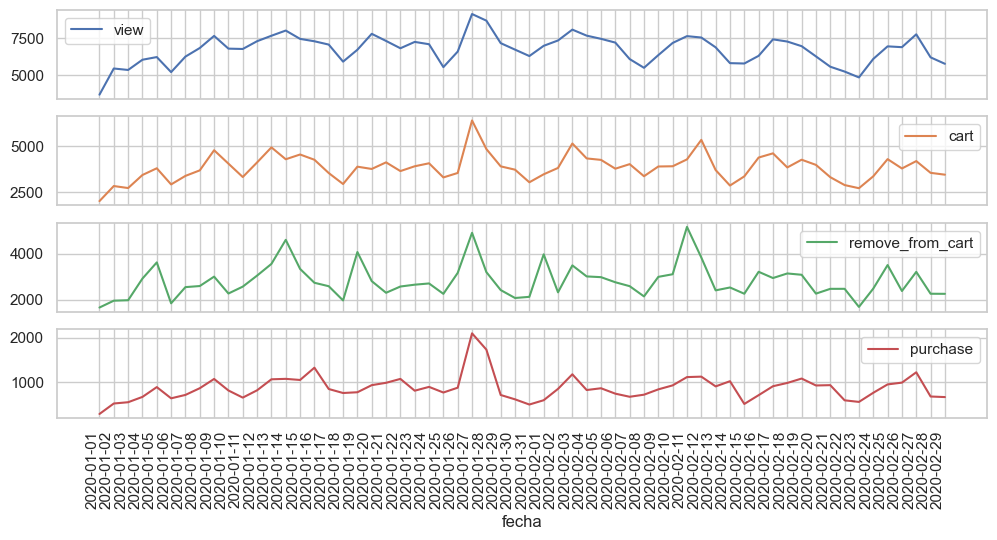

In [35]:
tendencia_diaria.plot(subplots = True, figsize = (12,6), xticks = tendencia_diaria.index, x_compat=True, rot=90)
plt.savefig("tendencia_diaria_Jan_Feb");

Conclusiones:

- Durante la semana de Reyes tampoco hay pico de ventas
- Ni los días previos a San Valentín
- Pero sí hay un pico muy pronunciado el 27 de Enero, seguramente algún evento local

**INSIGHT #2** La principal conclusión es que todo el pastel de las compras navideñas se reparte en la semana del black friday

### Análisis de los momentos importantes

In [36]:
compras_dia_hora = df.loc[df.evento=="purchase"].groupby(["date", "hora"]).evento.count().unstack(level = 0).fillna(0)
compras_dia_hora

date      2019-10-01      2019-10-02      2019-10-03      2019-10-04  \
hora                                                                   
0              13.00           18.00            1.00            2.00   
1               0.00            0.00            5.00            0.00   
2               0.00            0.00            0.00           24.00   
3               0.00           24.00           10.00            0.00   
4              15.00            0.00           45.00           27.00   
5              49.00            9.00            6.00           17.00   
6              23.00           34.00           18.00           10.00   
7              26.00           60.00           26.00           54.00   
8              28.00           71.00          129.00           49.00   
9              24.00           34.00           90.00           61.00   
10             15.00           62.00           43.00           22.00   
11             95.00           80.00           83.00           36.00   
12              9.00           43.00          100.00           67.00   
13             16.00           76.00           69.00           18.00   
14             74.00           31.00           38.00           36.00   
15             25.00           10.00           45.00           28.00   
16             99.00           21.00           33.00           42.00   
17             88.00           80.00           55.00           31.00   
18             53.00           24.00           35.00           54.00   
19             29.00           25.00           19.00           14.00   
20             53.00           22.00           63.00           17.00   
21              1.00           55.00           25.00           42.00   
22             33.00           10.00            0.00           42.00   
23              0.00            0.00            7.00            0.00   

date      2019-10-05      2019-10-06      2019-10-07      2019-10-08  \
hora                                                                   
0               0.00            0.00            0.00            0.00   
1               4.00           24.00            3.00            0.00   
2               0.00            0.00            0.00           18.00   
3               0.00           26.00            2.00           20.00   
4               3.00           24.00           12.00           46.00   
5               1.00           14.00           21.00           10.00   
6              10.00           13.00           38.00           35.00   
7              58.00           20.00           63.00           27.00   
8              20.00           37.00           27.00           41.00   
9              44.00            8.00           56.00           43.00   
10             58.00           37.00           52.00           14.00   
11             33.00           44.00           53.00           66.00   
12             75.00           37.00           58.00           48.00   
13             31.00           40.00           44.00          109.00   
14             39.00           12.00           44.00           22.00   
15            128.00          116.00            9.00           31.00   
16             49.00           24.00           24.00           40.00   
17              8.00            1.00           53.00           34.00   
18              8.00           13.00           65.00          109.00   
19             31.00           47.00           97.00           70.00   
20              8.00           15.00          142.00           34.00   
21             12.00            9.00           38.00            8.00   
22             38.00            0.00           20.00           19.00   
23              0.00           26.00            0.00            0.00   

date      2019-10-09      2019-10-10  ...      2020-02-20      2020-02-21  \
hora                                  ...                                   
0               3.00           23.00  ...           28.00            0.00   
1              16.00   

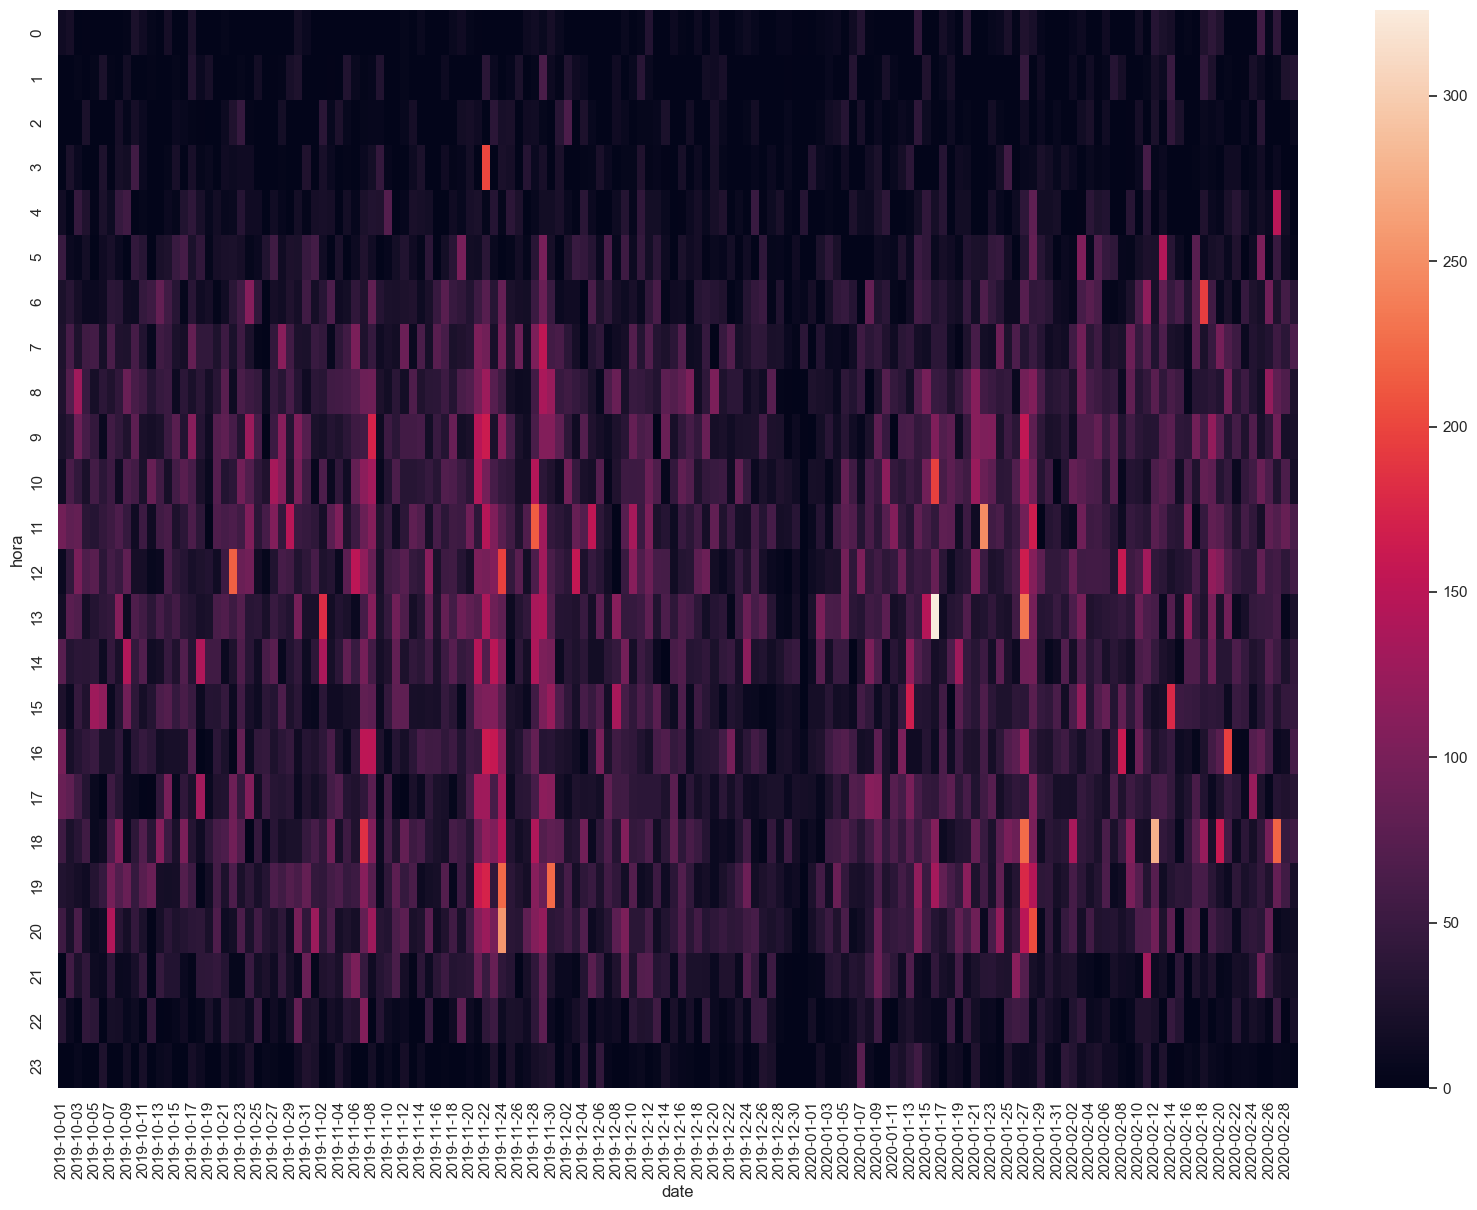

In [37]:
plt.figure(figsize = (20,14))
sns.heatmap(data= compras_dia_hora);

- Los cuadros más claros del gráfico muestran los momentos de mayores ventas, destacando el 17/01/2020 a las 13h.
- Para un ecommerce con 125.000 euros de facturación no vemos necesario cambiar la estrategia de inversión publicitaria específicamente a nivel de hora. 
- En un eccomerce mucho más grande con más inversión publicitaria sí seria necesario realizar este análisis

## Análisis de clientes

- Para analizar a nivel de cliente lo mejor es crear un dataframe de solo compradores con granularidad cliente y las variables que nos interesan.

In [38]:
df_clientes = df.loc[df.evento == "purchase"].groupby("usuario").agg({"producto": "count", 
                                                       "sesion": "nunique",
                                                        "precio":"mean", 
                                                        "date": "max"
                                                       })
df_clientes

producto  sesion          precio        date
usuario                                                
25392526          3       1            7.38  2019-12-18
27756757          1       1           20.63  2020-01-27
50748978          9       1            1.11  2019-12-14
52747911          3       1            7.67  2019-10-10
65241811          5       1            8.36  2019-11-11
...             ...     ...             ...         ...
621995551         5       1            2.09  2020-02-29
622021687         1       1           13.33  2020-02-29
622041514         3       1            0.63  2020-02-29
622042698         3       1           28.04  2020-02-29
622065819         4       1            5.12  2020-02-29

[11040 rows x 4 columns]

In [39]:
df_clientes.columns = ["productos_totales_num", "compras_totales_num", "precio_medio_prod", "ultima_compra"]
df_clientes

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
25392526                       3                    1               7.38   
27756757                       1                    1              20.63   
50748978                       9                    1               1.11   
52747911                       3                    1               7.67   
65241811                       5                    1               8.36   
...                          ...                  ...                ...   
621995551                      5                    1               2.09   
622021687                      1                    1              13.33   
622041514                      3                    1               0.63   
622042698                      3                    1              28.04   
622065819                      4                    1               5.12   

          ultima_compra  
usuario                  
25392526     2019-12-18  
27756757     2020-01-27  
50748978     2019-12-14  
52747911     2019-10-10  
65241811     2019-11-11  
...                 ...  
621995551    2020-02-29  
622021687    2020-02-29  
622041514    2020-02-29  
622042698    2020-02-29  
622065819    2020-02-29  

[11040 rows x 4 columns]

In [40]:
df_clientes["gasto_total"] = df_clientes.productos_totales_num * df_clientes.precio_medio_prod
df_clientes["productos_por_compra"] = df_clientes.productos_totales_num / df_clientes.compras_totales_num

In [41]:
df_clientes

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
25392526                       3                    1               7.38   
27756757                       1                    1              20.63   
50748978                       9                    1               1.11   
52747911                       3                    1               7.67   
65241811                       5                    1               8.36   
...                          ...                  ...                ...   
621995551                      5                    1               2.09   
622021687                      1                    1              13.33   
622041514                      3                    1               0.63   
622042698                      3                    1              28.04   
622065819                      4                    1               5.12   

          ultima_compra     gasto_total  productos_por_compra  
usuario                                                        
25392526     2019-12-18           22.14                  3.00  
27756757     2020-01-27           20.63                  1.00  
50748978     2019-12-14           10.01                  9.00  
52747911     2019-10-10           23.02                  3.00  
65241811     2019-11-11           41.79                  5.00  
...                 ...             ...                   ...  
621995551    2020-02-29           10.46                  5.00  
622021687    2020-02-29           13.33                  1.00  
622041514    2020-02-29            1.90                  3.00  
622042698    2020-02-29           84.13                  3.00  
622065819    2020-02-29           20.48                  4.00  

[11040 rows x 6 columns]

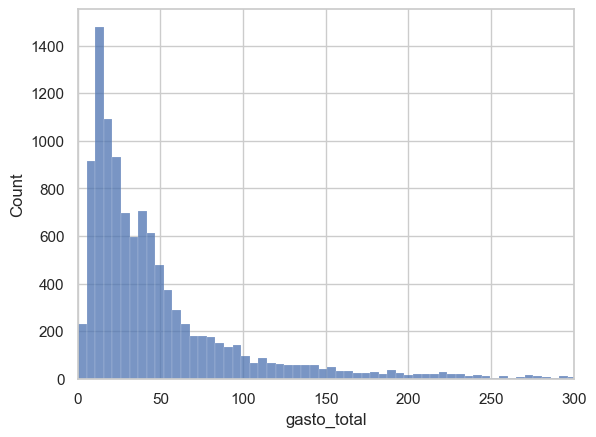

In [42]:
sns.histplot(data= df_clientes, x= df_clientes.gasto_total, bins=300)
plt.xlim([0,300])
plt.savefig("gasto_clientes");

- La gran mayoría de los clientes han gastado menos de 50€ en el período.

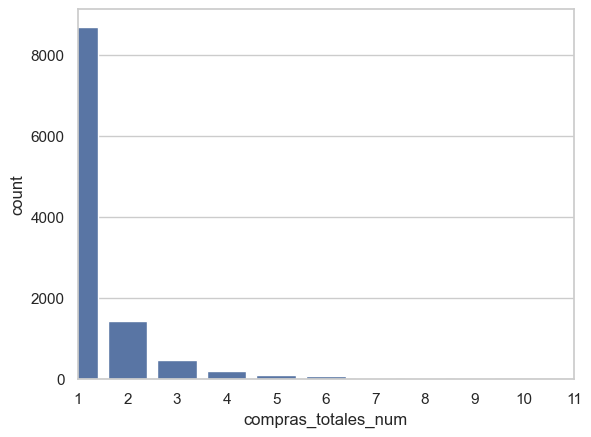

In [44]:
sns.countplot(data= df_clientes, x= df_clientes.compras_totales_num)
plt.xlim([0,10])
plt.savefig("compras_totales_num");

**INSIGHT #3** La gran mayoría de los clientes sólo hace una compra.

Hay que tener en cuenta que el periodo analizado es de 5 meses y al tratarse de un eccomerce de productos de cosméticos sería necesario analizar un periodo de tiempo superior. 

De todas formas, existe gran recorrido para mejorar este ratio mediante: email marketing con newletters y ofertas personalizadas

### Numero de productos que compra un cliente de media en cada compra

In [45]:
df_clientes.productos_por_compra.describe()

count          11040.00
mean               7.79
std                9.49
min                1.00
25%                3.00
50%                5.00
75%               10.00
max              219.00
Name: productos_por_compra, dtype: float64

**INSIGHT #4** La compra mediana incluye 5 productos.

Pero un 25% de los clientes compran más de 10 productos en la misma compra.

Existe gran recorrido para mejorar este ratio mediante: sistemas de recomendación en el momento de la compra

### Clientes con más ingresos

In [46]:
df_clientes.nlargest(n= 10, columns="gasto_total")

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
573823111                    268                    2               5.82   
539751397                    236                   13               6.16   
556579890                    506                    4               2.75   
442763940                    195                    8               6.37   
561592095                     94                    3              11.81   
527739278                    244                   13               4.39   
527806771                    195                   13               4.86   
430220205                    190                    6               4.99   
491009486                    219                    1               4.32   
520501669                     64                   11              14.27   

          ultima_compra     gasto_total  productos_por_compra  
usuario                                                        
573823111    2020-02-21         1559.21                134.00  
539751397    2020-02-19         1453.37                 18.15  
556579890    2020-02-27         1392.45                126.50  
442763940    2019-12-23         1241.53                 24.38  
561592095    2019-10-31         1109.70                 31.33  
527739278    2020-02-16         1071.00                 18.77  
527806771    2020-02-20          948.01                 15.00  
430220205    2020-02-29          947.30                 31.67  
491009486    2020-02-12          946.20                219.00  
520501669    2020-01-17          913.01                  5.82

In [47]:
df_clientes.gasto_total.describe()

count          11040.00
mean              56.30
std               81.73
min                0.13
25%               16.22
50%               32.74
75%               60.30
max             1559.21
Name: gasto_total, dtype: float64

- Entre los clientes que más gastan vemos que hay clientes que compran más de 100 prodructos por compra, por lo que parecen clientes profesionales
- **INSIGHT #5** El gasto medio de los mejores clientes es 50 veces superior al gasto medio 

Acciones para fidelizar a estos clientes mediante programas de fidelización 

### Análisis de supervivencia o de cohortes

Dado que solo tenemos 5 meses de histórico vamos a crear análisis de cohortes a 3 meses vista, lo cual nos da para hacer 3 cohortes.







Preparamos un dataframe solo con compradores y con las variables usuario y mes.

- Análisis de la supervivencia de los clientes 

In [48]:
df_clientes.value_counts().sum()

11040

In [49]:
c = df.loc[df.evento=="purchase", ["usuario", "mes"]]
c

usuario  mes
fecha                              
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
2019-10-01 00:26:49  536128518   10
...                        ...  ...
2020-02-29 22:29:19  622065819    2
2020-02-29 22:29:19  622065819    2
2020-02-29 22:29:19  622065819    2
2020-02-29 22:29:19  622065819    2
2020-02-29 23:26:42  610361057    2

[127564 rows x 2 columns]

In [50]:
c = pd.crosstab(c.usuario, c.mes).reset_index()
c

mes      usuario  1  2  10  11  12
0       25392526  0  0   0   0   3
1       27756757  1  0   0   0   0
2       50748978  0  0   0   0   9
3       52747911  0  0   3   0   0
4       65241811  0  0   0   5   0
...          ... .. ..  ..  ..  ..
11035  621995551  0  5   0   0   0
11036  622021687  0  1   0   0   0
11037  622041514  0  3   0   0   0
11038  622042698  0  3   0   0   0
11039  622065819  0  4   0   0   0

[11040 rows x 6 columns]

In [51]:
c.columns = ["usuario", "c4", "c5", "c1", "c2", "c3"]
c.drop(columns="usuario", inplace=True)
c = c[["c1", "c2", "c3", "c4", "c5"]]
c

c1  c2  c3  c4  c5
0       0   0   3   0   0
1       0   0   0   1   0
2       0   0   9   0   0
3       3   0   0   0   0
4       0   5   0   0   0
...    ..  ..  ..  ..  ..
11035   0   0   0   0   5
11036   0   0   0   0   1
11037   0   0   0   0   3
11038   0   0   0   0   3
11039   0   0   0   0   4

[11040 rows x 5 columns]

In [52]:
c2 = c.loc[(c.c1 ==0)&(c.c2>0)]
c2

c1  c2  c3  c4  c5
4      0   5   0   0   0
6      0  10   0   0   0
8      0  27  17   0   0
9      0   3   0   0   0
13     0   4   0   0   0
...   ..  ..  ..  ..  ..
7702   0   5   0   0   0
7703   0   2   0   0   5
7705   0   1   0   0   0
7708   0   5   6   0   0
7709   0   1   0   0   0

[2640 rows x 5 columns]

In [53]:
def binarizar(variable):
    variable = variable.transform(lambda x: 1 if(x>0) else 0)
    return variable

In [54]:
c2_b = c2.apply(binarizar)
c2_b

c1  c2  c3  c4  c5
4      0   1   0   0   0
6      0   1   0   0   0
8      0   1   1   0   0
9      0   1   0   0   0
13     0   1   0   0   0
...   ..  ..  ..  ..  ..
7702   0   1   0   0   0
7703   0   1   0   0   1
7705   0   1   0   0   0
7708   0   1   1   0   0
7709   0   1   0   0   0

[2640 rows x 5 columns]

In [55]:
c2_b = c2_b.mean()
c2_b

c1              0.00
c2              1.00
c3              0.10
c4              0.10
c5              0.08
dtype: float64

- Replicamos el proceso para el resto de cohortes

In [56]:
c3 = c.loc[(c.c2==0) & (c.c3>0)]
c3_b = c3.apply(binarizar)
c3_b = c3_b.mean()
c3_b["c1"] = 0
c3_b


c1              0.00
c2              0.00
c3              1.00
c4              0.10
c5              0.08
dtype: float64

In [57]:
c4 = c.loc[(c.c3==0) & (c.c4>0)]
c4_b = c4.apply(binarizar)
c4_b = c4_b.mean()
c4_b["c1"] = 0
c4_b["c2"] = 0
c4_b


c1              0.00
c2              0.00
c3              0.00
c4              1.00
c5              0.12
dtype: float64

In [58]:
cohortes = pd.DataFrame({"c2":c2_b , 
             "c3":c3_b ,
             "c4": c4_b,})
cohortes

c2              c3              c4
c1            0.00            0.00            0.00
c2            1.00            0.00            0.00
c3            0.10            1.00            0.00
c4            0.10            0.10            1.00
c5            0.08            0.08            0.12

In [59]:
cohortes.drop(index="c1").T
cohortes = cohortes.T
cohortes

c1              c2              c3              c4  \
c2            0.00            1.00            0.10            0.10   
c3            0.00            0.00            1.00            0.10   
c4            0.00            0.00            0.00            1.00   

                c5  
c2            0.08  
c3            0.08  
c4            0.12

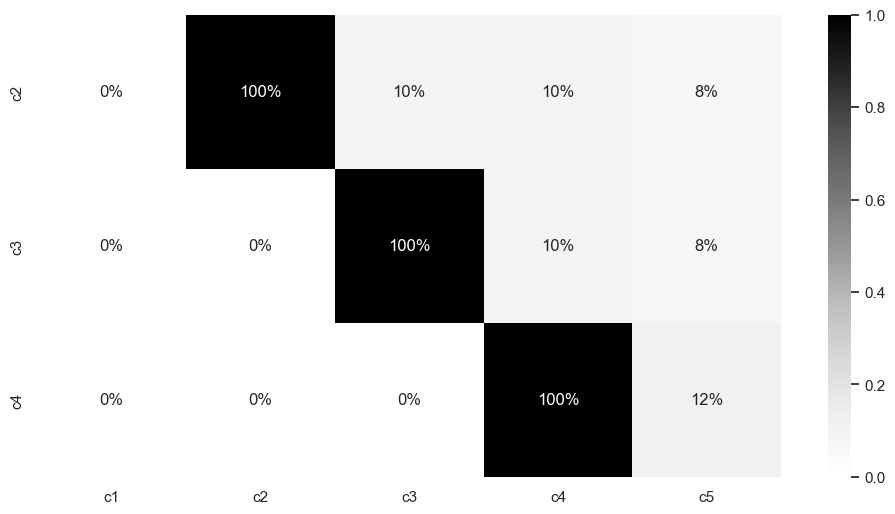

In [60]:
plt.figure(figsize = (12,6))
sns.heatmap(data = cohortes, annot = True,fmt=".0%" ,cmap="Greys")
plt.savefig("Cohortes");

**INSIGHT #6**: El 90% de que los nuevos clientes captados no vuelve a comprar en los meses posteriores

### Life Time Value (LTV)

Teniendo en cuenta el 90% de que los nuevos clientes no vuelve a comprar en los meses posteriores podemos calcular el LTV con el histórico que tenemos sin miedo a equivocarnos mucho.

Para ello vamos a coger a los clientes de la cohorte 2 (clientes nuevos en noviembre) y calcular el total de sus compras.

Calculamos su ltv de 4 meses

In [61]:
maestro_ltv = df.loc[(df.evento=="purchase") & (df.mes !=10) & (df.mes==11), "usuario"].drop_duplicates().to_list()

In [62]:
clientes_ltv = df_clientes.loc[df_clientes.index.isin(maestro_ltv)]
clientes_ltv

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
65241811                       5                    1               8.36   
80577370                      10                    2              10.62   
88211255                      22                    4               4.86   
93279832                      44                    2               3.19   
94390236                       3                    1               9.73   
...                          ...                  ...                ...   
579798049                      5                    1               2.10   
579813390                      7                    2               2.98   
579834429                      1                    1              27.14   
579900887                     11                    2               5.67   
579903865                      1                    1               8.43   

          ultima_compra     gasto_total  productos_por_compra  
usuario                                                        
65241811     2019-11-11           41.79                  5.00  
80577370     2019-11-29          106.24                  5.00  
88211255     2020-02-25          106.87                  5.50  
93279832     2019-12-19          140.51                 22.00  
94390236     2019-11-07           29.20                  3.00  
...                 ...             ...                   ...  
579798049    2019-11-30           10.52                  5.00  
579813390    2020-02-04           20.83                  3.50  
579834429    2019-11-30           27.14                  1.00  
579900887    2019-12-02           62.34                  5.50  
579903865    2019-11-30            8.43                  1.00  

[3105 rows x 6 columns]

In [63]:
clientes_ltv.gasto_total.describe()

count           3105.00
mean              79.62
std              113.62
min                0.13
25%               20.29
50%               41.49
75%               90.00
max             1453.37
Name: gasto_total, dtype: float64

Dada la variabilidad de la media sería más seguro coger la mediana.

**INSIGHT #7**: El LTV medio es de 42€ por cliente.

Aplicando nuestro margen sobre esa cifra y el % que queremos dedicar a captación nos sale el importe máximo a invertir en CPA.

Aplicar las acciones de CRO permitirá incrementar el LTV y por tanto también el CPA, siendo una ventaja estratégica muy importante.

### Segmentación RFM

Aplicamos la técnica llamada RFM (Recency - Frequency - Monetary).

Esta técnica es muy potente para contextos de retail y por tanto también en ecommerce.

Lo primero es identificar las variables con las que crear cada una de las dimensiones:

Recency: ult_compra

Frequency: compras_tot_num

Monetary: gasto_tot

Y discretizar cada una de ellas.


Comenzamos por Frequency

In [64]:
df_clientes["F"] = df_clientes.compras_totales_num.transform(lambda x: pd.cut(x,5, labels=False))+1
df_clientes

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
25392526                       3                    1               7.38   
27756757                       1                    1              20.63   
50748978                       9                    1               1.11   
52747911                       3                    1               7.67   
65241811                       5                    1               8.36   
...                          ...                  ...                ...   
621995551                      5                    1               2.09   
622021687                      1                    1              13.33   
622041514                      3                    1               0.63   
622042698                      3                    1              28.04   
622065819                      4                    1               5.12   

          ultima_compra     gasto_total  productos_por_compra  F  
usuario                                                           
25392526     2019-12-18           22.14                  3.00  1  
27756757     2020-01-27           20.63                  1.00  1  
50748978     2019-12-14           10.01                  9.00  1  
52747911     2019-10-10           23.02                  3.00  1  
65241811     2019-11-11           41.79                  5.00  1  
...                 ...             ...                   ... ..  
621995551    2020-02-29           10.46                  5.00  1  
622021687    2020-02-29           13.33                  1.00  1  
622041514    2020-02-29            1.90                  3.00  1  
622042698    2020-02-29           84.13                  3.00  1  
622065819    2020-02-29           20.48                  4.00  1  

[11040 rows x 7 columns]

In [65]:
df_clientes.groupby("F").compras_totales_num.mean()

F
1              1.31
2              7.06
3             12.00
4             16.50
5             23.50
Name: compras_totales_num, dtype: float64

- Calculamos Monetary

In [66]:
df_clientes["M"] = df_clientes.gasto_total.transform(lambda x: pd.cut(x, 5, labels=False)+1)

In [67]:
df_clientes.groupby("M").gasto_total.mean()

M
1             48.36
2            410.98
3            765.18
4           1043.96
5           1468.34
Name: gasto_total, dtype: float64

- Calculo de la Recencia
  
  No podemos hacer discretizaciones sobre una variable que es una fecha. Tenemos que hacerla numérica

In [68]:
fecha_ult_compra = df_clientes.ultima_compra.max()
fecha_ult_compra

datetime.date(2020, 2, 29)

In [69]:
df_clientes["ultima_compra_dias"] = df_clientes.ultima_compra.transform(lambda x: fecha_ult_compra - x)
df_clientes

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
25392526                       3                    1               7.38   
27756757                       1                    1              20.63   
50748978                       9                    1               1.11   
52747911                       3                    1               7.67   
65241811                       5                    1               8.36   
...                          ...                  ...                ...   
621995551                      5                    1               2.09   
622021687                      1                    1              13.33   
622041514                      3                    1               0.63   
622042698                      3                    1              28.04   
622065819                      4                    1               5.12   

          ultima_compra     gasto_total  productos_por_compra  F  M  \
usuario                                                               
25392526     2019-12-18           22.14                  3.00  1  1   
27756757     2020-01-27           20.63                  1.00  1  1   
50748978     2019-12-14           10.01                  9.00  1  1   
52747911     2019-10-10           23.02                  3.00  1  1   
65241811     2019-11-11           41.79                  5.00  1  1   
...                 ...             ...                   ... .. ..   
621995551    2020-02-29           10.46                  5.00  1  1   
622021687    2020-02-29           13.33                  1.00  1  1   
622041514    2020-02-29            1.90                  3.00  1  1   
622042698    2020-02-29           84.13                  3.00  1  1   
622065819    2020-02-29           20.48                  4.00  1  1   

          ultima_compra_dias  
usuario                       
25392526             73 days  
27756757             33 days  
50748978             77 days  
52747911            142 days  
65241811            110 days  
...                      ...  
621995551             0 days  
622021687             0 days  
622041514             0 days  
622042698             0 days  
622065819             0 days  

[11040 rows x 9 columns]

In [70]:
df_clientes.dtypes

productos_totales_num              int64
compras_totales_num                int64
precio_medio_prod                float64
ultima_compra                     object
gasto_total                      float64
productos_por_compra             float64
F                                  int64
M                                  int64
ultima_compra_dias       timedelta64[ns]
dtype: object

- Transformamos la variable timedelta a un entero 

In [71]:
df_clientes["ultima_compra_dias"] = df_clientes.ultima_compra_dias.dt.days
df_clientes

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
25392526                       3                    1               7.38   
27756757                       1                    1              20.63   
50748978                       9                    1               1.11   
52747911                       3                    1               7.67   
65241811                       5                    1               8.36   
...                          ...                  ...                ...   
621995551                      5                    1               2.09   
622021687                      1                    1              13.33   
622041514                      3                    1               0.63   
622042698                      3                    1              28.04   
622065819                      4                    1               5.12   

          ultima_compra     gasto_total  productos_por_compra  F  M  \
usuario                                                               
25392526     2019-12-18           22.14                  3.00  1  1   
27756757     2020-01-27           20.63                  1.00  1  1   
50748978     2019-12-14           10.01                  9.00  1  1   
52747911     2019-10-10           23.02                  3.00  1  1   
65241811     2019-11-11           41.79                  5.00  1  1   
...                 ...             ...                   ... .. ..   
621995551    2020-02-29           10.46                  5.00  1  1   
622021687    2020-02-29           13.33                  1.00  1  1   
622041514    2020-02-29            1.90                  3.00  1  1   
622042698    2020-02-29           84.13                  3.00  1  1   
622065819    2020-02-29           20.48                  4.00  1  1   

           ultima_compra_dias  
usuario                        
25392526                   73  
27756757                   33  
50748978                   77  
52747911                  142  
65241811                  110  
...                       ...  
621995551                   0  
622021687                   0  
622041514                   0  
622042698                   0  
622065819                   0  

[11040 rows x 9 columns]

- Discretizamos la variable para calcular la Recencia

In [72]:
df_clientes["R"] = df_clientes.ultima_compra_dias.transform(lambda x: pd.cut(x, 5, labels= False)+1)
df_clientes

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                    
25392526                       3                    1               7.38   
27756757                       1                    1              20.63   
50748978                       9                    1               1.11   
52747911                       3                    1               7.67   
65241811                       5                    1               8.36   
...                          ...                  ...                ...   
621995551                      5                    1               2.09   
622021687                      1                    1              13.33   
622041514                      3                    1               0.63   
622042698                      3                    1              28.04   
622065819                      4                    1               5.12   

          ultima_compra     gasto_total  productos_por_compra  F  M  \
usuario                                                               
25392526     2019-12-18           22.14                  3.00  1  1   
27756757     2020-01-27           20.63                  1.00  1  1   
50748978     2019-12-14           10.01                  9.00  1  1   
52747911     2019-10-10           23.02                  3.00  1  1   
65241811     2019-11-11           41.79                  5.00  1  1   
...                 ...             ...                   ... .. ..   
621995551    2020-02-29           10.46                  5.00  1  1   
622021687    2020-02-29           13.33                  1.00  1  1   
622041514    2020-02-29            1.90                  3.00  1  1   
622042698    2020-02-29           84.13                  3.00  1  1   
622065819    2020-02-29           20.48                  4.00  1  1   

           ultima_compra_dias  R  
usuario                           
25392526                   73  3  
27756757                   33  2  
50748978                   77  3  
52747911                  142  5  
65241811                  110  4  
...                       ... ..  
621995551                   0  1  
622021687                   0  1  
622041514                   0  1  
622042698                   0  1  
622065819                   0  1  

[11040 rows x 10 columns]

In [73]:
df_clientes.groupby("R").ultima_compra_dias.mean()

R
1             14.62
2             43.04
3             75.94
4            103.85
5            135.91
Name: ultima_compra_dias, dtype: float64

Hay que tener en cuenta que en este caso lo mejor son los valores más bajos.Para estandarizar su intrepretación con el resto de las dimensiones vamos a darle la vuelta.

In [74]:
df_clientes["R"] = df_clientes["R"].map({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})

In [75]:
df_clientes.groupby("R").ultima_compra_dias.mean()

R
1            135.91
2            103.85
3             75.94
4             43.04
5             14.62
Name: ultima_compra_dias, dtype: float64

### Segmentacion RFM

In [76]:
df_clientes["valor_rfm"] = df_clientes.R + df_clientes.F + df_clientes.M
df_clientes["rfm"] = df_clientes.R.apply(str) + df_clientes.F.apply(str) + df_clientes.M.apply(str)
df_clientes.head(5)

productos_totales_num  compras_totales_num  precio_medio_prod  \
usuario                                                                   
25392526                      3                    1               7.38   
27756757                      1                    1              20.63   
50748978                      9                    1               1.11   
52747911                      3                    1               7.67   
65241811                      5                    1               8.36   

         ultima_compra     gasto_total  productos_por_compra  F  M  \
usuario                                                              
25392526    2019-12-18           22.14                  3.00  1  1   
27756757    2020-01-27           20.63                  1.00  1  1   
50748978    2019-12-14           10.01                  9.00  1  1   
52747911    2019-10-10           23.02                  3.00  1  1   
65241811    2019-11-11           41.79                  5.00  1  1   

          ultima_compra_dias  R  valor_rfm  rfm  
usuario                                          
25392526                  73  3          5  311  
27756757                  33  4          6  411  
50748978                  77  3          5  311  
52747911                 142  1          3  111  
65241811                 110  2          4  211

Sobre este dataframe ya podemos hacer infinidad de análisis.


In [77]:
metricas = ["productos_totales_num", "compras_totales_num", "gasto_total"]
dimensiones = ["R","F","M","rfm","valor_rfm"]

minicubo = df_clientes[dimensiones + metricas]
minicubo = minicubo.melt(id_vars = metricas)
minicubo = minicubo.groupby(["variable", "value"], as_index = False)[metricas].agg("mean")
minicubo

variable value  productos_totales_num  compras_totales_num  \
0           F     1                  10.61                 1.31   
1           F     2                  71.42                 7.06   
2           F     3                 123.64                12.00   
3           F     4                 156.75                16.50   
4           F     5                 124.00                23.50   
..        ...   ...                    ...                  ...   
58  valor_rfm     9                  98.02                 7.25   
59  valor_rfm    10                 140.89                10.22   
60  valor_rfm    11                 291.00                 5.75   
61  valor_rfm    12                 189.80                16.60   
62  valor_rfm    13                 179.00                18.00   

       gasto_total  
0            52.09  
1           320.47  
2           643.20  
3           560.15  
4           652.42  
..             ...  
58          491.71  
59          625.93  
60         1189.31  
61          833.43  
62         1136.70  

[63 rows x 5 columns]

Para analizar cada dimensión la seleccionamos. 

In [78]:
minicubo[minicubo.variable == "F"]

variable value  productos_totales_num  compras_totales_num     gasto_total
0        F     1                  10.61                 1.31           52.09
1        F     2                  71.42                 7.06          320.47
2        F     3                 123.64                12.00          643.20
3        F     4                 156.75                16.50          560.15
4        F     5                 124.00                23.50          652.42

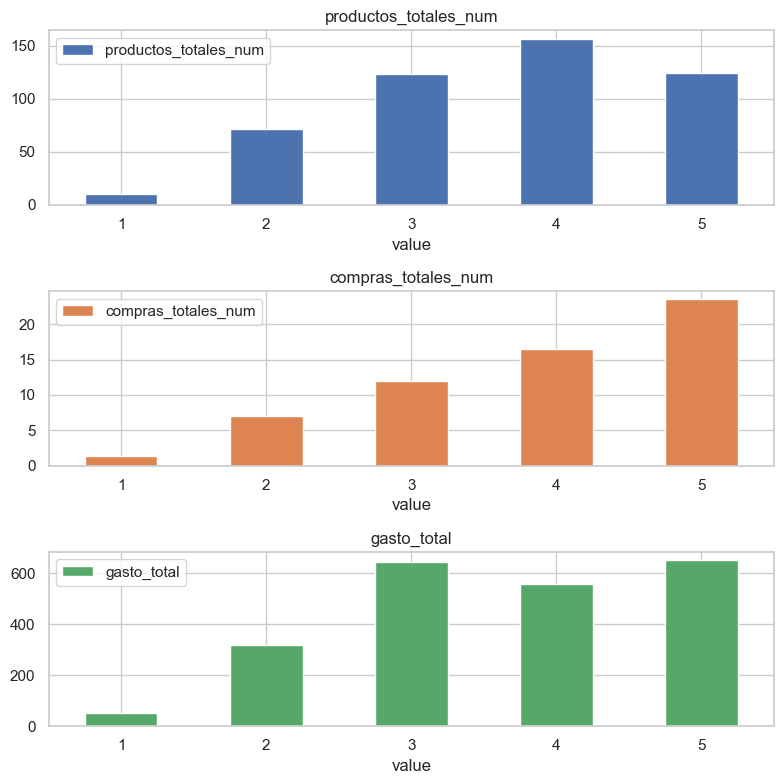

In [79]:
minicubo[minicubo.variable == "F"].set_index("value").plot.bar(subplots = True, figsize = (8,8), sharex=False, rot= 360)
plt.tight_layout()

In [80]:
minicubo[minicubo.variable =="R"]

variable value  productos_totales_num  compras_totales_num     gasto_total
10        R     1                   8.15                 1.08           41.56
11        R     2                   9.25                 1.18           45.58
12        R     3                   9.54                 1.29           47.25
13        R     4                  11.72                 1.44           58.19
14        R     5                  16.83                 1.82           79.04

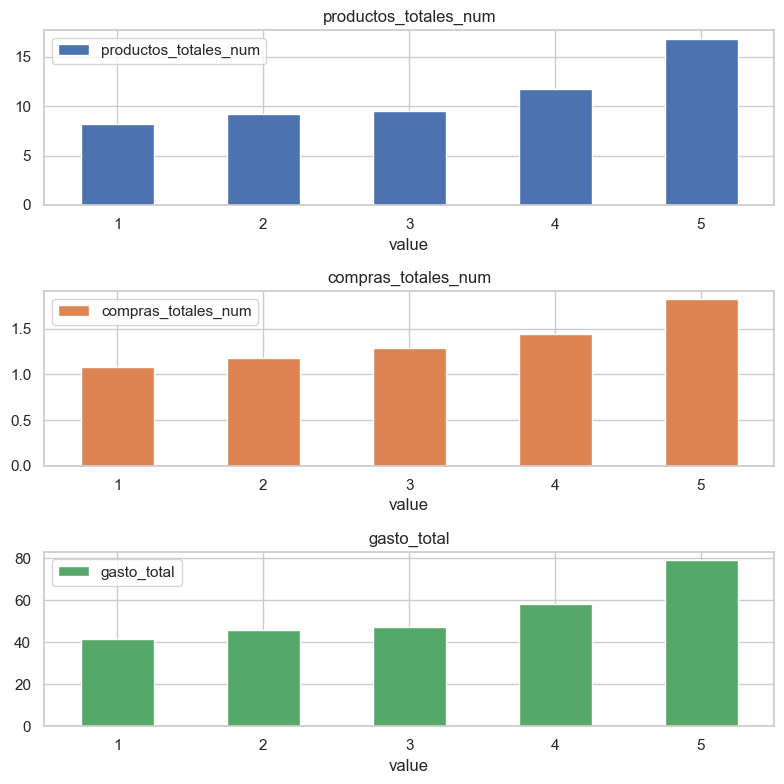

In [81]:
minicubo[minicubo.variable =="R"].set_index("value").plot.bar(subplots=True, figsize = (8,8), sharex=False, rot=360)
plt.tight_layout();

In [82]:
minicubo[minicubo.variable =="M"]

variable value  productos_totales_num  compras_totales_num     gasto_total
5        M     1                  10.12                 1.34           48.36
6        M     2                  74.28                 4.31          410.98
7        M     3                 138.50                 6.86          765.18
8        M     4                 189.50                 7.33         1043.96
9        M     5                 336.67                 6.33         1468.34

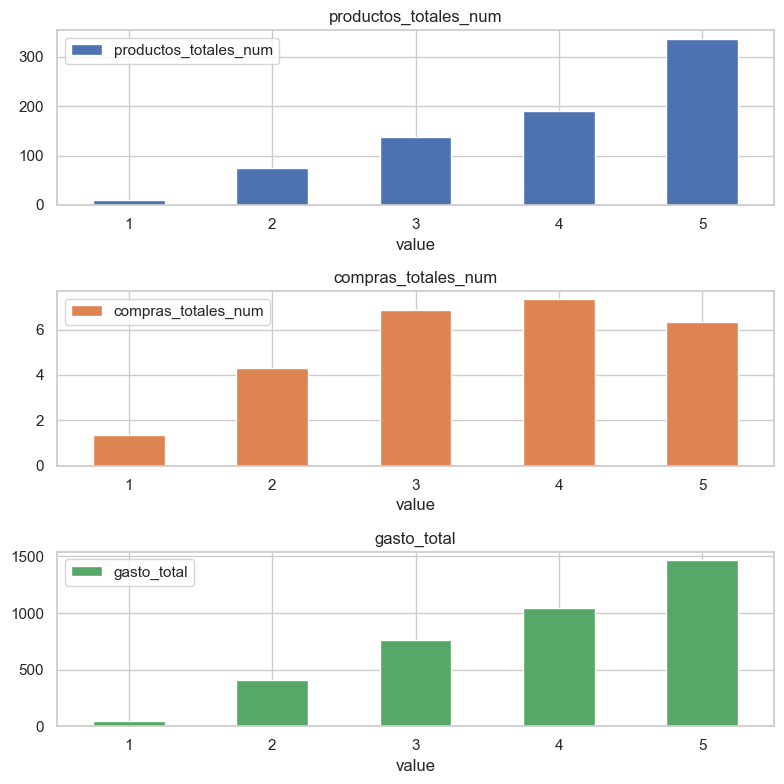

In [83]:
minicubo[minicubo.variable =="M"].set_index("value").plot.bar(subplots=True, figsize = (8,8), sharex=False, rot=360)
plt.tight_layout();

In [84]:
minicubo[minicubo.variable == "rfm"]

variable value  productos_totales_num  compras_totales_num     gasto_total
15      rfm   111                   7.97                 1.08           39.28
16      rfm   112                  37.38                 1.50          397.98
17      rfm   114                  94.00                 3.00         1109.70
18      rfm   211                   8.94                 1.17           43.16
19      rfm   212                  47.00                 1.73          391.14
20      rfm   213                  35.50                 1.00          662.84
21      rfm   221                  85.67                 6.33          194.48
22      rfm   311                   8.98                 1.26           43.91
23      rfm   312                  53.46                 2.46          376.38
24      rfm   321                  39.00                 6.50          141.28
25      rfm   322                 121.00                 6.50          389.19
26      rfm   324                 195.00                 8.00         1241.53
27      rfm   411                  10.37                 1.36           49.99
28      rfm   412                  60.69                 2.54          404.22
29      rfm   413                 130.50                 2.50          868.30
30      rfm   421                  41.00                 6.92          205.31
31      rfm   422                  92.88                 7.12          440.47
32      rfm   423                 153.33                 7.33          672.97
33      rfm   433                  64.00                11.00          913.01
34      rfm   511                  11.94                 1.50           56.07
35      rfm   512                  78.79                 3.05          399.18
36      rfm   513                 133.00                 3.14          742.48
37      rfm   514                 219.00                 1.00          946.20
38      rfm   515                 387.00                 3.00         1475.83
39      rfm   521                  47.88                 6.83          192.19
40      rfm   522                  89.51                 7.51          442.50
41      rfm   523                 184.67                 7.33          766.90
42      rfm   524                 190.00                 6.00          947.30
43      rfm   531                  58.25                11.50          233.84
44      rfm   532                  94.00                12.50          448.09
45      rfm   533                 200.00                11.00          858.26
46      rfm   534                 219.50                13.00         1009.51
47      rfm   535                 236.00                13.00         1453.37
48      rfm   541                 121.50                16.50          288.65
49      rfm   543                 192.00                16.50          831.65
50      rfm   552                 126.00                24.00          484.81
51      rfm   553                 122.00                23.00          820.04

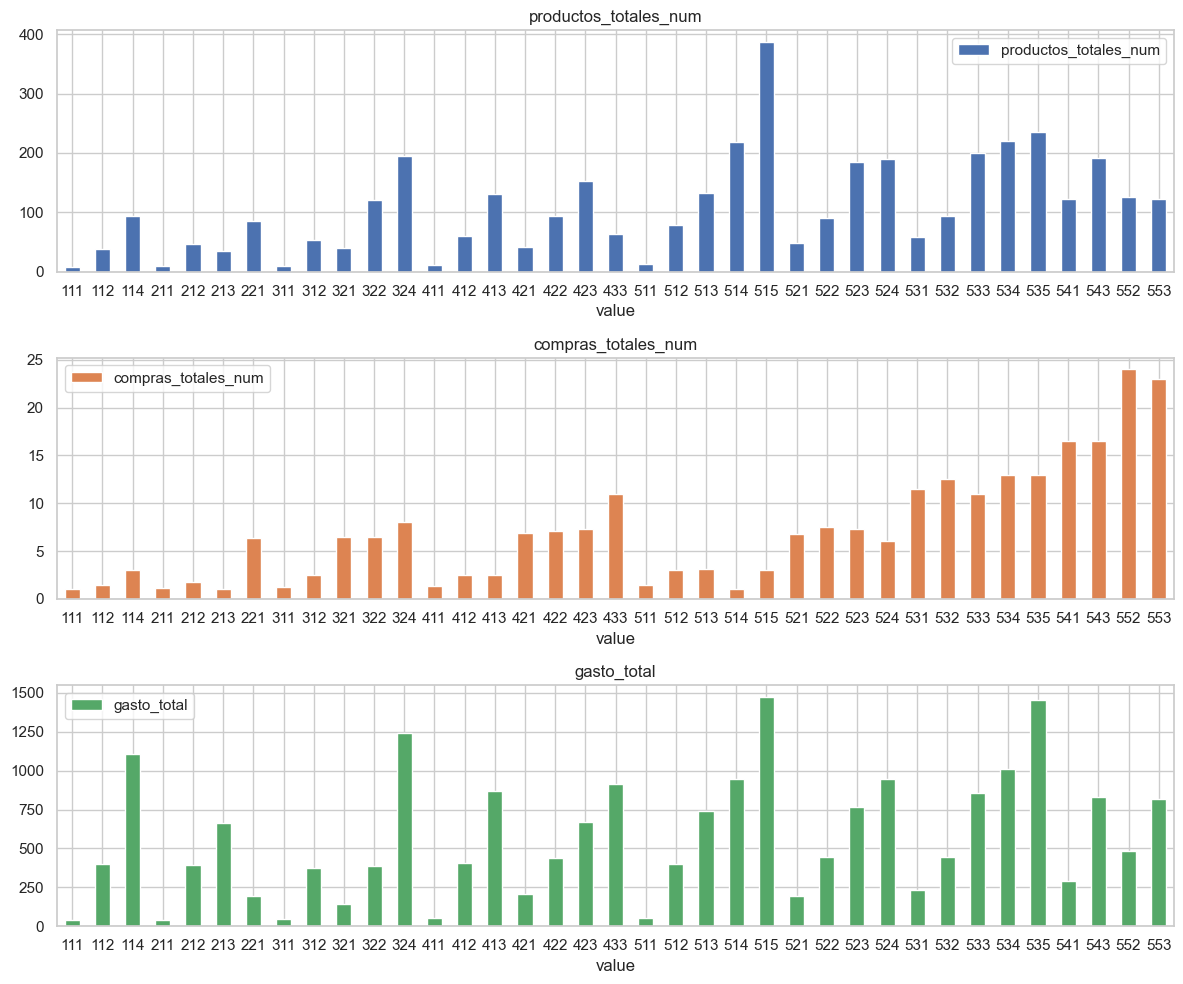

In [85]:
minicubo[minicubo.variable == "rfm"].set_index("value").plot.bar(subplots = True, figsize = (12,10), sharex= False, rot= 360)
plt.tight_layout();

In [86]:
minicubo[minicubo.variable == "valor_rfm"]

variable value  productos_totales_num  compras_totales_num  \
52  valor_rfm     3                   7.97                 1.08   
53  valor_rfm     4                   9.04                 1.17   
54  valor_rfm     5                   9.31                 1.27   
55  valor_rfm     6                  10.73                 1.38   
56  valor_rfm     7                  12.64                 1.54   
57  valor_rfm     8                  66.13                 5.06   
58  valor_rfm     9                  98.02                 7.25   
59  valor_rfm    10                 140.89                10.22   
60  valor_rfm    11                 291.00                 5.75   
61  valor_rfm    12                 189.80                16.60   
62  valor_rfm    13                 179.00                18.00   

       gasto_total  
52           39.28  
53           44.41  
54           46.08  
55           53.07  
56           60.42  
57          313.01  
58          491.71  
59          625.93  
60         1189.31  
61          833.43  
62         1136.70

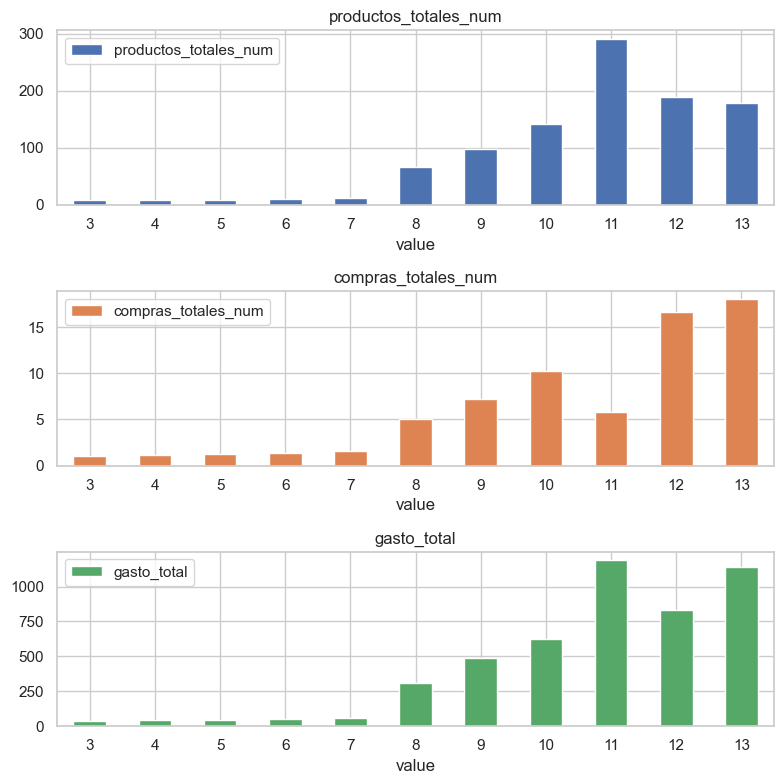

In [87]:
minicubo[minicubo.variable == "valor_rfm"].set_index("value").plot.bar(subplots = True, figsize = (8,8), sharex = False, rot = 360)
plt.tight_layout();

Se podría mejorar el análisis porque en F y M los atípicos hacen que se concentren la mayoría de los datos en la categoría 1.

Se podría eliminar esos atípicos y volver a realizar el mismo ejercicio. Discretización manual en lugar de automática

Pero con este análisis somos capaces de identificar los clientes que con mayor probabilidad responderán mejor a nuevas campañas, además de obtener un montón de insights valiosos para el negocio.

- Estrategias comerciales diferentes para cada uno de los segmentos (a los de mayor valor atención al cliente más directa, por teléfono en lugar de mail)

- Estrategias comerciales diferentes a la hora configurar campañas de promoción , clubes de fidelización, newsletter, clientes gemelos (averiguar las caracteristicas de los clientes 11, 12, 13 y ver a través de que canal hicimos la captación de los clientes, y buscar clientes similares utilizando las misma campañas de captación)

## Análisis de los productos

### Creación del Datamart para el análisis de producto

- Creación del dataset de productos 

In [88]:
prod = df.groupby(["producto", "evento"]).size()
prod

producto  evento          
3752      view                 10
3762      cart                127
          purchase             28
          remove_from_cart     59
          view                258
                             ... 
5932538   view                  1
5932540   cart                  1
          view                  2
5932578   view                  1
5932585   view                  2
Length: 137068, dtype: int64

In [89]:
prod = prod = prod.unstack(level = 1).fillna(0)
prod

evento              cart        purchase  remove_from_cart            view
producto                                                                  
3752                0.00            0.00              0.00           10.00
3762              127.00           28.00             59.00          258.00
3763               10.00            2.00              2.00           51.00
3771                0.00            0.00              0.00            9.00
3774               26.00            7.00             13.00           76.00
...                  ...             ...               ...             ...
5932537             1.00            0.00              0.00            1.00
5932538             0.00            0.00              0.00            1.00
5932540             1.00            0.00              0.00            2.00
5932578             0.00            0.00              0.00            1.00
5932585             0.00            0.00              0.00            2.00

[45327 rows x 4 columns]

- Creación del maestro de precios

In [90]:
maestro_precios = df.groupby("producto", as_index = False).precio.mean()
maestro_precios

producto          precio
0          3752           15.71
1          3762           19.29
2          3763           16.00
3          3771           15.08
4          3774           15.92
...         ...             ...
45322   5932537            1.43
45323   5932538            1.43
45324   5932540            1.43
45325   5932578            6.02
45326   5932585            6.33

[45327 rows x 2 columns]

- Unimos el dataset de productos con el maestro de precios por el campo clave producto

In [91]:
prod = pd.merge(left = prod, right= maestro_precios, on = "producto", how="left")
prod = prod[["producto", "view", "cart", "remove_from_cart", "purchase", "precio"]]
prod

producto            view            cart  remove_from_cart  \
0          3752           10.00            0.00              0.00   
1          3762          258.00          127.00             59.00   
2          3763           51.00           10.00              2.00   
3          3771            9.00            0.00              0.00   
4          3774           76.00           26.00             13.00   
...         ...             ...             ...               ...   
45322   5932537            1.00            1.00              0.00   
45323   5932538            1.00            0.00              0.00   
45324   5932540            2.00            1.00              0.00   
45325   5932578            1.00            0.00              0.00   
45326   5932585            2.00            0.00              0.00   

             purchase          precio  
0                0.00           15.71  
1               28.00           19.29  
2                2.00           16.00  
3                0.00           15.08  
4                7.00           15.92  
...               ...             ...  
45322            0.00            1.43  
45323            0.00            1.43  
45324            0.00            1.43  
45325            0.00            6.02  
45326            0.00            6.33  

[45327 rows x 6 columns]

### Análisis de las ventas de los productos

#### Productos más vendidos

In [92]:
prod.sort_values("purchase", ascending = False)[0:20]

producto            view            cart  remove_from_cart  \
16807   5809910         9195.00         2796.00           1249.00   
28178   5854897          624.00         2486.00            793.00   
6644    5700037         1150.00         2603.00            716.00   
314        5304          516.00         1184.00            426.00   
9900    5751422         2204.00         1119.00            625.00   
15394   5802432          701.00         2495.00            745.00   
16809   5809912         3059.00         1352.00            863.00   
18415   5815662         1219.00         1697.00            653.00   
9862    5751383         2341.00         1035.00            550.00   
14043   5792800         1527.00          911.00            512.00   
26312   5849033         2099.00         1035.00            583.00   
5386    5686925          344.00         1677.00            499.00   
6653    5700046          432.00         1376.00            381.00   
1761    5528035         1146.00          719.00            401.00   
22111   5833330          680.00          576.00            359.00   
16808   5809911         1923.00          828.00            599.00   
18525   5816170         1642.00          751.00            532.00   
5420    5687151          508.00          540.00            288.00   
8232    5729864          160.00          505.00            211.00   
24787   5843836          165.00         1007.00            265.00   

             purchase          precio  
16807          764.00            5.21  
28178          483.00            0.32  
6644           361.00            0.40  
314            341.00            0.32  
9900           331.00           10.87  
15394          322.00            0.32  
16809          321.00            5.19  
18415          310.00            0.91  
9862           298.00           10.24  
14043          285.00           10.25  
26312          278.00           10.25  
5386           231.00            0.35  
6653           215.00            0.40  
1761           200.00            9.44  
22111          194.00            0.92  
16808          189.00            5.21  
18525          182.00            5.22  
5420           179.00            1.90  
8232           176.00            0.41  
24787          172.00            0.38

- Posiblemente lograríamos incrementar las ventas y el ticket medio simplemente destacando estos productos en la tienda.
- Si tuvieramos más información sobre los productos, buscar patrones entre los productos más vendidos

#### Productos menos vendidos

In [93]:
prod[prod.purchase == 0]

producto            view            cart  remove_from_cart  \
0          3752           10.00            0.00              0.00   
3          3771            9.00            0.00              0.00   
6          3790           10.00            0.00              0.00   
8          3809            2.00            0.00              0.00   
9          3812            1.00            0.00              0.00   
...         ...             ...             ...               ...   
45322   5932537            1.00            1.00              0.00   
45323   5932538            1.00            0.00              0.00   
45324   5932540            2.00            1.00              0.00   
45325   5932578            1.00            0.00              0.00   
45326   5932585            2.00            0.00              0.00   

             purchase          precio  
0                0.00           15.71  
3                0.00           15.08  
6                0.00            7.92  
8                0.00           12.54  
9                0.00           12.54  
...               ...             ...  
45322            0.00            1.43  
45323            0.00            1.43  
45324            0.00            1.43  
45325            0.00            6.02  
45326            0.00            6.33  

[21850 rows x 6 columns]

**INSIGHT #8**: Casi la mitad de los productos no han tenido ninguna venta en los 5 meses del histórico.

Se podría comenzar todo un nuevo análisis sobre estos productos:

- ¿No se ven?
- ¿Se ven pero no se compran?
- ¿Es porque se sustituyen por otros productos propios?
- ¿Es porque están mucho más baratos en la competencia?
Etc

Se podrían eliminar del catálogo, o como mínimo de la tienda, newsletter, etc, para que no ocupen espacio de los productos que sí se venden.

### Relación entre el precio y el número de ventas

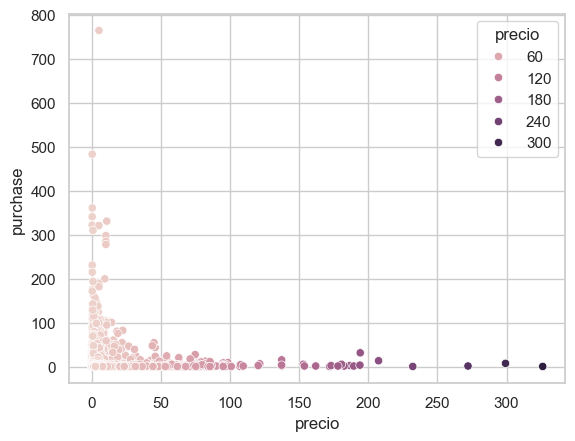

In [94]:
sns.scatterplot(data = prod[(prod.purchase > 0)], x= "precio", y = "purchase", hue= "precio");

Sí que existe una clara relación decreciente.

Vamos a hacer zoom por ejemplo por debajo de 20€ para entenderlo mejor.

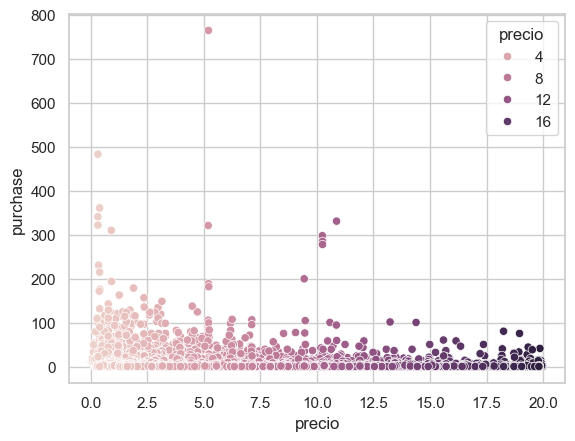

In [95]:
sns.scatterplot(data = prod[(prod.purchase > 0) & (prod.precio <20)], x= "precio", y = "purchase", hue= "precio")
plt.savefig("scatter_compras_precio");

### Productos que se eliminan del carrito

In [96]:
prod.insert(loc = 4, column = "remove_from_cart_pct", value = (prod.remove_from_cart/ prod.cart) *100)


In [97]:
prod.fillna({"remove_from_cart_pct": 0}, inplace=True)


In [98]:
prod

producto            view            cart  remove_from_cart  \
0          3752           10.00            0.00              0.00   
1          3762          258.00          127.00             59.00   
2          3763           51.00           10.00              2.00   
3          3771            9.00            0.00              0.00   
4          3774           76.00           26.00             13.00   
...         ...             ...             ...               ...   
45322   5932537            1.00            1.00              0.00   
45323   5932538            1.00            0.00              0.00   
45324   5932540            2.00            1.00              0.00   
45325   5932578            1.00            0.00              0.00   
45326   5932585            2.00            0.00              0.00   

       remove_from_cart_pct        purchase          precio  
0                      0.00            0.00           15.71  
1                     46.46           28.00           19.29  
2                     20.00            2.00           16.00  
3                      0.00            0.00           15.08  
4                     50.00            7.00           15.92  
...                     ...             ...             ...  
45322                  0.00            0.00            1.43  
45323                  0.00            0.00            1.43  
45324                  0.00            0.00            1.43  
45325                  0.00            0.00            6.02  
45326                  0.00            0.00            6.33  

[45327 rows x 7 columns]

- Filtramos por los productos que hayan sido añadidos al carrito más de 30 veces, para que la variable que mide el % de veces que un producto se elimina del carrito tenga mayor credibilidad estadística. 

In [99]:
prod.loc[prod.cart >30].sort_values("remove_from_cart_pct", ascending = False)

producto            view            cart  remove_from_cart  \
14330   5797131           26.00           38.00            136.00   
37937   5893670           36.00           35.00            109.00   
29128   5858481           41.00           31.00             64.00   
16658   5809346            8.00           34.00             62.00   
26120   5848412           34.00           37.00             66.00   
...         ...             ...             ...               ...   
25671   5847168           21.00           33.00              3.00   
16456   5809093            6.00           50.00              4.00   
34710   5878933           10.00           36.00              2.00   
1263      35758            6.00           32.00              0.00   
1262      35756            3.00           58.00              0.00   

       remove_from_cart_pct        purchase          precio  
14330                357.89            7.00            4.43  
37937                311.43            3.00            4.90  
29128                206.45            7.00            4.55  
16658                182.35            7.00            0.78  
26120                178.38           12.00            0.79  
...                     ...             ...             ...  
25671                  9.09            2.00            3.77  
16456                  8.00            6.00            1.03  
34710                  5.56            3.00            2.38  
1263                   0.00            2.00            7.75  
1262                   0.00            3.00            9.18  

[4041 rows x 7 columns]

Habría que revisar por qué estos productos se eliminan más veces de las que se añaden:

Si el motivo tiene sentido: revisar qué pasa con estos productos (otros productos alternativos, etc.)
Si no lo tiene eliminar estos registros y analizar únicamente los que tienen remove_from_cart_porc menor o igual a 100

In [100]:
prod.loc[(prod.cart >30) & (prod.remove_from_cart_pct <=100)].sort_values("remove_from_cart_pct", ascending = False)

producto            view            cart  remove_from_cart  \
1687      86008           56.00           44.00             44.00   
17708   5813059           38.00           36.00             36.00   
7959    5724630           23.00           36.00             36.00   
2977    5618226           32.00           39.00             39.00   
14041   5792796           37.00           31.00             31.00   
...         ...             ...             ...               ...   
25671   5847168           21.00           33.00              3.00   
16456   5809093            6.00           50.00              4.00   
34710   5878933           10.00           36.00              2.00   
1263      35758            6.00           32.00              0.00   
1262      35756            3.00           58.00              0.00   

       remove_from_cart_pct        purchase          precio  
1687                 100.00            4.00            4.39  
17708                100.00           10.00            1.72  
7959                 100.00           11.00            2.48  
2977                 100.00           10.00            4.29  
14041                100.00            6.00            4.42  
...                     ...             ...             ...  
25671                  9.09            2.00            3.77  
16456                  8.00            6.00            1.03  
34710                  5.56            3.00            2.38  
1263                   0.00            2.00            7.75  
1262                   0.00            3.00            9.18  

[3584 rows x 7 columns]

### Productos más vistos



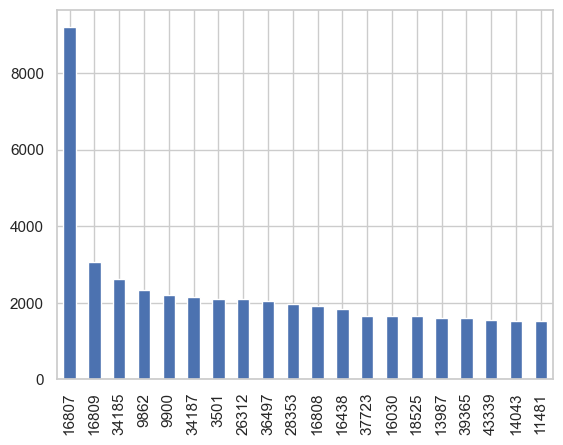

In [101]:
prod.view.sort_values(ascending= False)[0:20].plot.bar()
plt.savefig("productos_mas_vistos");

Destaca sobre todo un producto por encima del resto. 

Posiblemente lograríamos incrementar las ventas y el ticket medio simplemente destacando estos productos en la tienda.

Siempre que además de ser vistos también se vendan.

In [102]:
prod_mas_vistos = list(prod.view.sort_values(ascending=False).index[0:20])

In [103]:
prod_mas_comprados=list(prod.purchase.sort_values(ascending =False).index[0:20])

In [104]:
productos_vistos_comprados = [producto for producto in prod_mas_vistos if producto in prod_mas_comprados]
productos_vistos_comprados

[16807, 16809, 9862, 9900, 26312, 16808, 18525, 14043]

- 8 de los productos mas vistos estan entre los más comprados. Acciones sobre el resto de productos muy vistos y no comprados para aumentar sus ventas 

### Productos visualizados pero no comprados

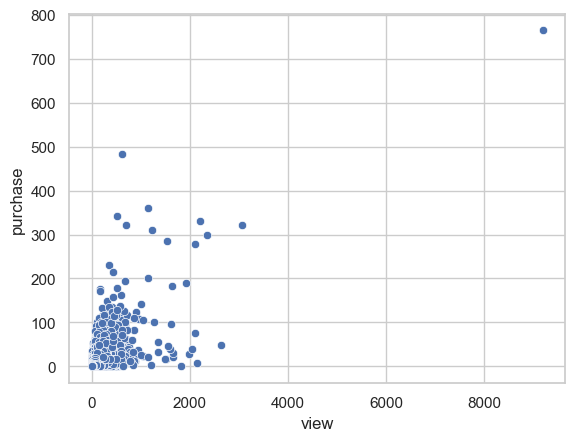

In [105]:
sns.scatterplot(data = prod, x = "view", y="purchase");

- Destaca sobre todo un producto, se visualiza y se compra muchas veces. Se podría investigar y utilizar como producto gancho para que se compren otros productos. 

Vamos a quitar el atípico y hacer zoom en la ventana de muchas vistas pocas compras.

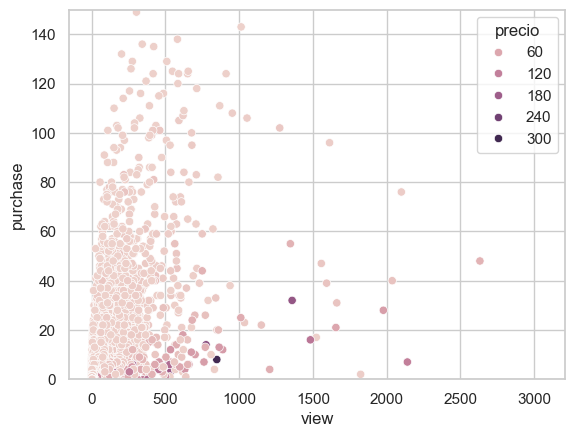

In [106]:
sns.scatterplot(data = prod.loc[prod.view<4000], x = "view", y="purchase", hue="precio");

plt.ylim(0,150)
plt.savefig("prod_vistos_no_comprados")

Hay una oportunidad con estos productos, porque por algún motivo generan el interés de los clientes, pero finalmente no los compran.

Habría que hacer un análisis sobre los productos que se están viendo más pero se compran poco 

## Sistemas de Recomendación 

- Se crea un sistema de recomendación para incrementar las ventas del eccomerce 

En nuestro caso vamos a desarrollar uno con filtrado colaborativo basado en items.

Los pasos a seguir son:

- Crear el dataframe con el kpi de interés
- Reducir la dimensión (opcional)
- Seleccionar una métrica de distancia
- Calcular la matriz item-item
- Crear la lógica de priorización


### Crear el dataframe con el Kpi de interés

Como Kpi utilizaremos el número de veces que los productos han sido comprados por el mismo usuario

Dado que es un algoritmo que tarda en calcularse, reducimos el problema y lo calculamos para los 1000 productos más vendidos

Calculamos un dataframe con los 1000 productos más vendidos

In [107]:
mas_vendidos = prod.sort_values(by="purchase", ascending= False).producto[0:1000]
mas_vendidos

16807    5809910
28178    5854897
6644     5700037
314         5304
9900     5751422
          ...   
15987    5804664
29882    5861354
5331     5686080
13623    5787014
29780    5861114
Name: producto, Length: 1000, dtype: int64

Creamos un daframe filtrando por estos productos

In [108]:
temp = df.loc[df.producto.isin(mas_vendidos)]
temp

usuario                                sesion  \
fecha                                                                  
2019-10-01 00:03:41  555448072  b5f72ceb-0730-44de-a932-d16db62390df   
2019-10-01 00:04:42  485644718  4afc450a-3459-46db-89c0-84b73aa0fd64   
2019-10-01 00:06:09  480874420  90e9a50a-2718-42dd-b5e4-a9e3293c2dad   
2019-10-01 00:08:55  514753614  e2fecb2d-22d0-df2c-c661-15da44b3ccf1   
2019-10-01 00:09:08  514753614  e2fecb2d-22d0-df2c-c661-15da44b3ccf1   
...                        ...                                   ...   
2020-02-29 23:51:41  510268740  0ddfed47-8b29-4fe5-97bf-549b194770a4   
2020-02-29 23:53:26  542453207  ab577907-958b-435d-800c-548e95cb74d5   
2020-02-29 23:58:49  147995998  5ff96629-3627-493e-a25b-5a871ec78c90   
2020-02-29 23:58:57  147995998  5ff96629-3627-493e-a25b-5a871ec78c90   
2020-02-29 23:59:05  147995998  5ff96629-3627-493e-a25b-5a871ec78c90   

                               categoria            evento  producto  \
fecha                                                                  
2019-10-01 00:03:41  1487580013749338323              view   5649270   
2019-10-01 00:04:42  1487580008145748965              view   5550686   
2019-10-01 00:06:09  1487580013950664926              view   5785144   
2019-10-01 00:08:55  1487580013053083824  remove_from_cart   5788783   
2019-10-01 00:09:08  1487580012902088873  remove_from_cart   5651938   
...                                  ...               ...       ...   
2020-02-29 23:51:41  1487580013522845895              cart   5861386   
2020-02-29 23:53:26  1487580009362096156  remove_from_cart   5700069   
2020-02-29 23:58:49  1487580006317032337              cart   5815662   
2020-02-29 23:58:57  1487580006317032337              view   5815665   
2020-02-29 23:59:05  1487580006317032337              cart   5815665   

                             precio        date   año  mes  dia  hora  minuto  \
fecha                                                                           
2019-10-01 00:03:41            6.19  2019-10-01  2019   10    1     0       3   
2019-10-01 00:04:42            1.11  2019-10-01  2019   10    1     0       4   
2019-10-01 00:06:09           11.83  2019-10-01  2019   10    1     0       6   
2019-10-01 00:08:55            1.98  2019-10-01  2019   10    1     0       8   
2019-10-01 00:09:08            6.33  2019-10-01  2019   10    1     0       9   
...                             ...         ...   ...  ...  ...   ...     ...   
2020-02-29 23:51:41            3.97  2020-02-29  2020    2   29    23      51   
2020-02-29 23:53:26            0.63  2020-02-29  2020    2   29    23      53   
2020-02-29 23:58:49            0.92  2020-02-29  2020    2   29    23      58   
2020-02-29 23:58:57            0.59  2020-02-29  2020    2   29    23      58   
2020-02-29 23:59:05            0.59  2020-02-29  2020    2   29    23      59   

                     segundo  festivo  black_friday  san_valentin  
fecha                                                              
2019-10-01 00:03:41       41        0             0             0  
2019-10-01 00:04:42       42        0             0             0  
2019-10-01 00:06:09        9        0             0             0  
2019-10-01 00:08:55       55        0             0             0  
2019-10-01 00:09:08        8        0             0             0  
...                      ...      ...           ...           ...  
2020-02-29 23:51:41       41        0             0             0  
2020-02-29 23:53:26       26        0             0             0  
2020-02-29 23:58:49       49        0             0             0  
2020-02-29 23:58:57       57        0             0             0  
2020-02-29 23:59:05        5        0             0             0  

[572288 rows x 16 columns]

creamos la matriz usuario-item

In [109]:
usuario_item = temp.loc[temp.evento== "purchase"].groupby(["usuario", "producto"]).size().unstack(level= 1).fillna(0)
usuario_item

producto          3762            4185            4497            4554     \
usuario                                                                     
25392526             0.00            0.00            0.00            0.00   
50748978             0.00            0.00            0.00            0.00   
74332980             0.00            0.00            0.00            0.00   
80577370             0.00            0.00            0.00            0.00   
88211255             0.00            0.00            0.00            0.00   
...                   ...             ...             ...             ...   
621995551            0.00            0.00            0.00            0.00   
622021687            0.00            0.00            0.00            0.00   
622041514            0.00            0.00            0.00            0.00   
622042698            0.00            0.00            0.00            0.00   
622065819            0.00            0.00            0.00            0.00   

producto          4571            4591            4600            4607     \
usuario                                                                     
25392526             0.00            0.00            0.00            0.00   
50748978             0.00            0.00            0.00            0.00   
74332980             0.00            0.00            0.00            0.00   
80577370             0.00            0.00            0.00            0.00   
88211255             0.00            0.00            0.00            0.00   
...                   ...             ...             ...             ...   
621995551            0.00            0.00            0.00            0.00   
622021687            0.00            0.00            0.00            0.00   
622041514            0.00            0.00            0.00            0.00   
622042698            0.00            0.00            0.00            0.00   
622065819            0.00            0.00            0.00            0.00   

producto          4632            4649     ...         5906098  \
usuario                                    ...                   
25392526             0.00            0.00  ...            0.00   
50748978             0.00            0.00  ...            0.00   
74332980             0.00            0.00  ...            0.00   
80577370             0.00            0.00  ...            0.00   
88211255             0.00            0.00  ...            0.00   
...                   ...             ...  ...             ...   
621995551            0.00            0.00  ...            0.00   
622021687            0.00            0.00  ...            0.00   
622041514            0.00            0.00  ...            0.00   
622042698            0.00            0.00  ...            0.00   
622065819            0.00            0.00  ...            0.00   

producto          5906114         5906118         5906119         5906121  \
usuario                                                                     
25392526             0.00            0.00            0.00            0.00   
50748978             0.00            0.00            0.00            0.00   
74332980             0.00            0.00            0.00            0.00   
80577370             0.00            0.00            0.00            0.00   
88211255             0.00            0.00            0.00            0.00   
...                   ...             ...             ...             ...   
621995551            0.00            0.00            0.00            0.00   
622021687            0.00            0.00            0.00            0.00   
622041514            0.00            0.00            0.00            0.00   
622042698            0.00            0.00            0.00            0.00   
622065819            0.00            0.00            0.00            0.00   

producto          5906122         5909810         5914455         5917178  \
usuario                                                   

Vemos que nos sale una matriz dispersa, podría ser conveniente reducir la dimensionalidad, pero en este caso continumos sin hacer la reducción. 

### Seleccionar una métrica de distancia entre vectores

En este caso vamos a utilizar la distancia euclídea

In [113]:
from scipy import spatial

### Calcular la matriz item-item

- Creamos el recomendador, que toma como input una matriz usuario-item, y devuleve la matriz item-item con la distancia euclídea como dato

In [114]:
def recomendador(dataframe):
    def distancia(producto): 
        return (dataframe.apply(lambda x: spatial.distance.euclidean(x, producto)))
    return(dataframe.apply(lambda x : distancia(x)))

In [115]:
item_item = recomendador(usuario_item)

In [116]:
item_item

producto         3762            4185            4497            4554     \
producto                                                                   
3762                0.00            7.00           12.65            7.94   
4185                7.00            0.00           13.53            9.27   
4497               12.65           13.53            0.00           12.45   
4554                7.94            9.27           12.45            0.00   
4571                7.14            8.60           11.87            6.16   
...                  ...             ...             ...             ...   
5906122            10.00           11.09           14.28           10.34   
5909810             7.07            8.54           12.49            7.55   
5914455             7.21            8.66           12.49            7.68   
5917178             9.11           10.30           13.75            9.49   
5924482             8.66            9.90           13.45            9.06   

producto         4571            4591            4600            4607     \
producto                                                                   
3762                7.14            8.31           10.95           10.34   
4185                8.60            9.59           11.96           11.40   
4497               11.87           13.15           14.42           13.82   
4554                6.16            8.60            9.54            8.72   
4571                0.00            8.12            9.54            8.25   
...                  ...             ...             ...             ...   
5906122             9.75           10.63           12.57           11.87   
5909810             6.71            7.94           10.68           10.05   
5914455             6.71            8.19           10.68           10.05   
5917178             8.83            9.80           12.12           11.58   
5924482             8.37            9.49           11.79           11.22   

producto         4632            4649     ...         5906098         5906114  \
producto                                  ...                                   
3762                7.81            7.07  ...            7.07            7.62   
4185                9.17            8.54  ...            8.54            9.00   
4497               12.45           12.08  ...           12.49           12.73   
4554                7.87            6.71  ...            7.55            8.06   
4571                6.93            5.00  ...            6.56            7.28   
...                  ...             ...  ...             ...             ...   
5906122            10.15            9.59  ...            9.06            8.37   
5909810             7.42            6.63  ...            6.63            7.21   
5914455             7.42            6.78  ...            6.78            7.35   
5917178             9.38            8.77  ...            8.77            9.22   
5924482             8.94            8.31  ...            8.31            8.77   

producto         5906118         5906119         5906121         5906122  \
producto                                                                   
3762                8.49            8.83            7.81           10.00   
4185                9.75           10.05            9.17           11.09   
4497               13.42           13.56           12.92           14.28   
4554                9.00            9.11            8.12           10.34   
4571                8.31            8.43            7.35            9.75   
...                  ...             ...             ...             ...   
5906122            10.10            9.59            8.77            0.00   
5909810             8.25            8.37            7.42            9.59   
5914455             8.25            8.60            7.55            9.80   
5917178             9.95           10.15            9.38           11.18   
5924482             9.64            9.75            8.94

### Crear la lógica de priorización 

Para mejorar la efectividad de nuestro sistema de recomendaciones, utilizaremos la información acumulada de la sesión del usuario o su historial completo (si está logado). De esta forma, podremos generar recomendaciones no solo basadas en un único producto, sino en varios productos que el usuario haya visto o añadido al carrito.

El objetivo es tener un sistema de recomendación flexible que funcione tanto con un solo producto como con varios, y que pueda devolver múltiples recomendaciones para cubrir diferentes necesidades de nuestra web.

#### Algoritmo Propuesto

1. Crear un array con los productos de entrada para extraer sus vectores de la matriz item-item.
2. Calcular la suma de distancias de estos productos respecto a todos los demás productos.
3. Excluir los productos de entrada para evitar autorecomendaciones.
4. Devolver los 10 productos con menor distancia como recomendaciones finales.

Este enfoque permite utilizar tanto la interacción más reciente del usuario (por ejemplo, un producto que acaba de ver) como su comportamiento acumulado durante la sesión para ofrecer recomendaciones relevantes y personalizadas.


In [149]:
def priorizador(productos, n=10): #FUncion que recibe una cadena con códigos de producto y devuelve los 10 productos recomendados 
    array = np.int64(productos.split(sep = ";")) # Separa los id de producto que se reciben en la cadena

    matriz = item_item[array] # Filtra la matriz item_item por los productos de entrada 

    suma_distancias = matriz.agg("sum",axis=1) # Calcular la suma de distancias de estos productos respecto a todos los demás productos


    suma_distancias = suma_distancias.loc[~suma_distancias.index.isin(array)] #Excluir los productos de entrada para evitar autorecomendaciones

                                                                              

    df_recomendados = ((suma_distancias.sort_values()[0:n])) #Devuelve los 10 productos con menor distancia 

    return df_recomendados

In [150]:
priorizador("4554;5909810;5924482")

producto
4689                21.00
4571                21.24
4765                21.52
4649                21.65
5877190             22.09
5861114             22.13
5835947             22.20
5865798             22.22
5820751             22.22
5804664             22.29
dtype: float64